In [58]:
from completeRun import featureClf,cv_feature
from preamble import *
from copy import copy
from LocalDatasets import saveDict,readDict,ScoresFromPredictions,read_features,readDict, read_duration,checkForExist
from Noise2 import features
import seaborn as sns
from copy import copy
plt.rcParams['savefig.dpi'] = 200
Cat = [3,20, 21, 26, 333, 334, 335,40668, 4135, 4534, 469, 46, 50]
amountList = [0.25,0.5,0.75,1]
NonCat = [1038,1043,1046,1049,1050,1063,1067,1068,1176,11,12,1459,1462,1464,1466,1467,1468,1475,1476,1478,1479,1485,1487]
second = [1489, 1491, 1492, 1493, 1494, 1497, 14, 1501, 1504, 1510, 1515, 1570, 16, 18, 22, 28, 300, 30, 32, 36, 375, 37, 39,40499,40509,40, 4134, 41, 44, 4538, 458, 53, 54]
for i in second:
    NonCat.append(i)
          
cv = 10
clfNames = [ 'RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf','GaussianNB', 'BernoulliNB','GradientBoost']



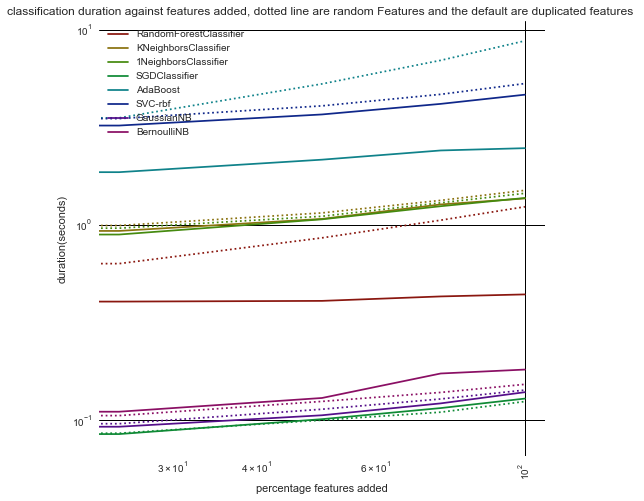

In [50]:
clfNames = [ 'RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf','GaussianNB', 'BernoulliNB']
didList = Cat
# didList.remove(1014)
# for i in NonCat:
#     didList.append(i)

# clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf', 'GaussianNB', 'BernoulliNB']
func = 'cvScoreFeatures5'
func2 = 'cvScoreFeatures4'
dur1 = []
dur2 = []
dur3 = []
typ = 0
funcDur = []
func2Dur = []
amountList = [0.25,0.5,0.75,1] 
for i,x in enumerate(clfNames):
    funcDur.append([])
    func2Dur.append([])
    dur1.append([]) 
    dur2.append([])
    dur3.append([])
    for j,x in enumerate(amountList):
        func2Dur[i].append([])
        funcDur[i].append([])
        dur1[i].append(0) 
        dur2[i].append(0)
        dur3[i].append(0)
    dur2[i].append(0)
    dur3[i].append(0)
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            if not checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func2,clfName,amount,did)
            funcDur[cs][i].append(read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
            func2Dur[cs][i].append(read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
            dur1[cs][i] = dur1[cs][i] + funcDur[cs][i][0][typ]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + funcDur[cs][i][0][typ+2]/len(didList)
            dur2[cs][0] = dur2[cs][0] + funcDur[cs][i][0][typ]/(len(didList)*len(amountList))
            dur3[cs][i+1] = dur3[cs][i+1] + func2Dur[cs][i][0][typ+2]/len(didList)
            dur3[cs][0] = dur3[cs][0] + func2Dur[cs][i][0][typ]/(len(didList)*len(amountList))
            dur1[cs][i] = dur1[cs][i] + funcDur[cs][i][0][typ+1]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + funcDur[cs][i][0][typ+3]/len(didList)
            dur2[cs][0] = dur2[cs][0] + funcDur[cs][i][0][typ+1]/(len(didList)*len(amountList))
            dur3[cs][i+1] = dur3[cs][i+1] + func2Dur[cs][i][0][typ+3]/len(didList)
            dur3[cs][0] = dur3[cs][0] + func2Dur[cs][i][0][typ+1]/(len(didList)*len(amountList))




for i,x in enumerate(amountList):
    amountList[i] = x*100
amountList2 = copy(amountList)
amountList.insert(0,0)
x_axis = amountList
cl = sns.hls_palette(len(dur2), l=.3, s=.8)
fig, ax = plt.subplots()
for i in range(0,len(dur2)):
#     _= ax.scatter(x_axis,dur1[i], label = clfNames[i],color = cl[i] )
    _= ax.plot(x_axis,dur2[i], color = cl[i],label = clfNames[i] )
    _= ax.plot(x_axis,dur3[i], color = cl[i],ls = ':' )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title('classification duration against features added, dotted line are random Features and the default are duplicated features ')
_=plt.ylabel('duration(seconds)')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4' or func == 'cvScoreFeatures5':
    _=plt.xlabel('percentage features added')
elif func == 'cvScoreFeatures1':
    _=plt.xlabel('features removed')
#_=plt.yscale("log", nonposy='clip')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log", nonposy='clip')
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
_=plt.legend()
_=plt.show()

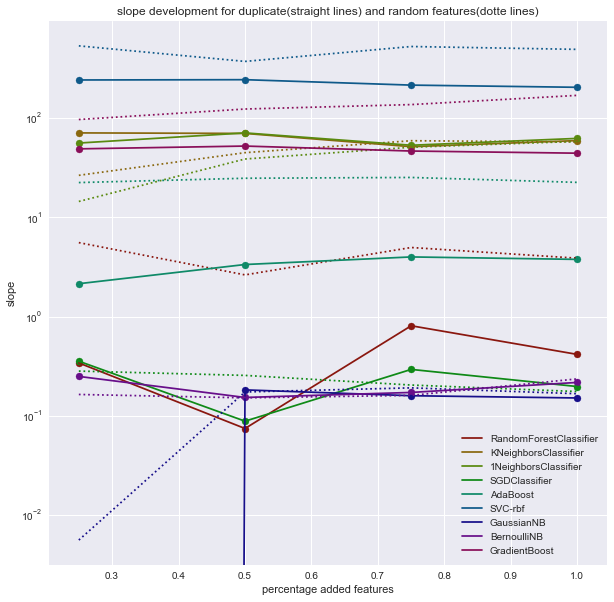

In [6]:
slopeDup = []
slopeRand = []
amountList2 = []
for i in amountList:
    amountList2.append(i/100)
for i,item in enumerate(dur2):
    slopeDup.append([])
    slopeRand.append([])
    for j,itemz in enumerate(item):
        if j == 0:
            count = 0
        else:
            slopeDup[i].append((dur2[i][j]-dur2[i][j-1])/(amountList2[j]-amountList2[j-1]))
            slopeRand[i].append((dur3[i][j]-dur3[i][j-1])/(amountList2[j]-amountList2[j-1]))

fig, ax = plt.subplots()
cl = sns.hls_palette(len(slopeDup), l=.3, s=.8)
for i,x in enumerate(slopeDup):
    ax.plot(amountList2[1:],slopeDup[i],label = clfNames[i],color= cl[i])
    ax.scatter(amountList2[1:],slopeDup[i],color= cl[i])
    ax.plot(amountList2[1:],slopeRand[i],ls = ':',color= cl[i])
plt.xlabel('percentage added features')
plt.ylabel('slope')
plt.title('slope development for duplicate(straight lines) and random features(dotte lines)')
fig.set_figheight(10)
fig.set_figwidth(10)
ax.set_yscale("log", nonposy='clip')
plt.legend()
plt.show()

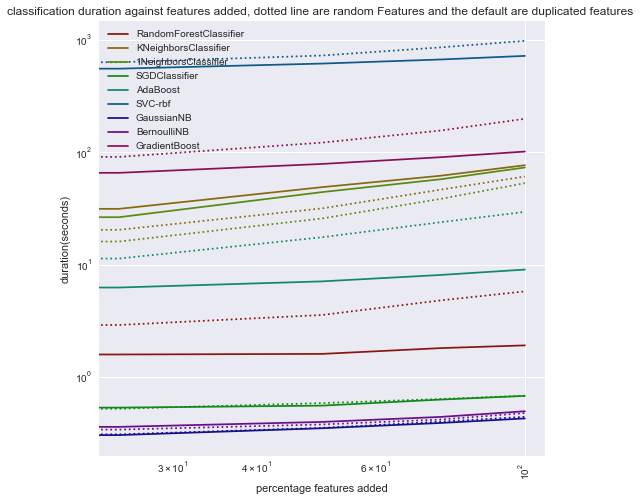

In [7]:
didList = Cat
# for i in NonCat:
#     didList.append(i)
# clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf', 'GaussianNB', 'BernoulliNB']
func = 'cvScoreFeatures5'
func2 = 'cvScoreFeatures4'
dur1 = []
dur2 = []
dur3 = []
typ = 0

amountList = [0.25,0.5,0.75,1] 
for i,x in enumerate(clfNames):
    dur1.append([]) 
    dur2.append([])
    dur3.append([])
    for j,x in enumerate(amountList):
        dur1[i].append(0) 
        dur2[i].append(0)
        dur3[i].append(0)
    dur2[i].append(0)
    dur3[i].append(0)
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            if not checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func2,clfName,amount,did)
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur3[cs][i+1] = dur3[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur3[cs][0] = dur3[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))
            dur3[cs][i+1] = dur3[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur3[cs][0] = dur3[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))


cl = sns.hls_palette(len(dur2), l=.3, s=.8)
fig, ax = plt.subplots()
for i,x in enumerate(amountList):
    amountList[i] = x*100
amountList2 = copy(amountList)
amountList.insert(0,0)
x_axis = amountList
for i in range(0,len(dur2)):
#     _= ax.scatter(x_axis,dur1[i], label = clfNames[i],color = cl[i] )
    _= ax.plot(x_axis,dur2[i], color = cl[i],label = clfNames[i] )
    _= ax.plot(x_axis,dur3[i], color = cl[i],ls = ':' )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title('classification duration against features added, dotted line are random Features and the default are duplicated features ')
_=plt.ylabel('duration(seconds)')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4' or func == 'cvScoreFeatures5':
    _=plt.xlabel('percentage features added')
elif func == 'cvScoreFeatures1':
    _=plt.xlabel('features removed')
#_=plt.yscale("log", nonposy='clip')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

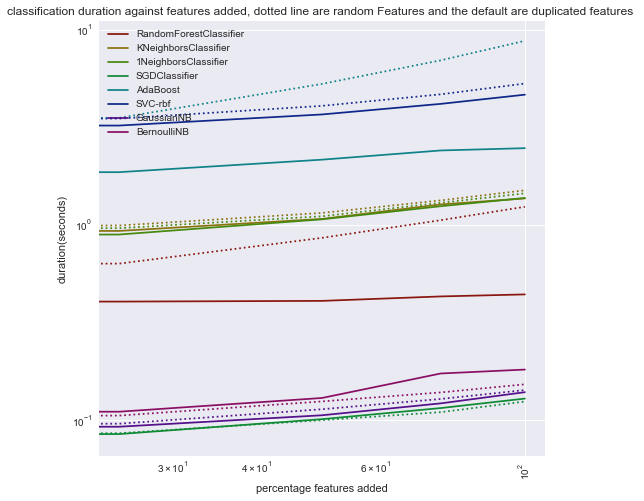

In [51]:
didList = Cat
for i in NonCat:
    didList.append(i)
# clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf', 'GaussianNB', 'BernoulliNB']
func = 'cvScoreFeatures5'
func2 = 'cvScoreFeatures4'
dur1 = []
dur2 = []
dur3 = []
typ = 0
funcDur = []
func2Dur = []
amountList = [0.25,0.5,0.75,1] 
for i,x in enumerate(clfNames):
    funcDur.append([])
    func2Dur.append([])
    dur1.append([]) 
    dur2.append([])
    dur3.append([])
    for j,x in enumerate(amountList):
        funcDur[i].append([])
        func2Dur[i].append([])
        dur1[i].append(0) 
        dur2[i].append(0)
        dur3[i].append(0)
    dur2[i].append(0)
    dur3[i].append(0)
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            if not checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func2,clfName,amount,did)
            funcDur[cs][i].append(read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
            func2Dur[cs][i].append(read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
            dur1[cs][i] = dur1[cs][i] + funcDur[cs][i][0][typ]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + funcDur[cs][i][0][typ+2]/len(didList)
            dur2[cs][0] = dur2[cs][0] + funcDur[cs][i][0][typ]/(len(didList)*len(amountList))
            dur3[cs][i+1] = dur3[cs][i+1] + func2Dur[cs][i][0][typ+2]/len(didList)
            dur3[cs][0] = dur3[cs][0] + func2Dur[cs][i][0][typ]/(len(didList)*len(amountList))
            dur1[cs][i] = dur1[cs][i] + funcDur[cs][i][0][typ+1]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + funcDur[cs][i][0][typ+3]/len(didList)
            dur2[cs][0] = dur2[cs][0] + funcDur[cs][i][0][typ+1]/(len(didList)*len(amountList))
            dur3[cs][i+1] = dur3[cs][i+1] + func2Dur[cs][i][0][typ+3]/len(didList)
            dur3[cs][0] = dur3[cs][0] + func2Dur[cs][i][0][typ+1]/(len(didList)*len(amountList))


cl = sns.hls_palette(len(dur2), l=.3, s=.8)
fig, ax = plt.subplots()
for i,x in enumerate(amountList):
    amountList[i] = x*100
amountList2 = copy(amountList)
amountList.insert(0,0)
x_axis = amountList
for i in range(0,len(dur2)):
#     _= ax.scatter(x_axis,dur1[i], label = clfNames[i],color = cl[i] )
    _= ax.plot(x_axis,dur2[i], color = cl[i],label = clfNames[i] )
    _= ax.plot(x_axis,dur3[i], color = cl[i],ls = ':' )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title('classification duration against features added, dotted line are random Features and the default are duplicated features ')
_=plt.ylabel('duration(seconds)')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4' or func == 'cvScoreFeatures5':
    _=plt.xlabel('percentage features added')
elif func == 'cvScoreFeatures1':
    _=plt.xlabel('features removed')
#_=plt.yscale("log", nonposy='clip')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

### analysis categorical and numerical classification prediction duration
On this logscale most classifier do not have a significant change in duration. 
In particular RandomForestClassifier seems nearly unaffacted by the feature addition. This can be explained by no increase in n_neighbors and so the algorithm making the same size tree only with more features to check.
The KneighborsClassifier also show little difference between a single neighbor and the default setting of 5 neighbors with categorical datasets. The difference is a bit more noticable with the categorical datasets
The lines are also a bit more steeper with the categorical datasets.
The steepest curve seems to be from the KNeighborsClassifier which has a steep increase with the 25% added features and then afterwards increases steadily.
When you compare the results of duplicate with random features, most classifiers have increase durations, however KNeighborsClassifer has a lower duration increase. This can be explained by only three categorical categories for added features. The original features have more categories which can explain more computation. 
For the randomForestClassifier there is a large increase in duration this can be explained by the variance or noise depending on how you see it. The features have no inherent predicting capabilities so finding them can be the luck of the draw. This means that the RandomForestClassifier is trying to find something that is no there. 


For KNeighborsClassifier this comment:
 'if user attempts to classify a point that was zero distance from one or more training points, those training points are weighted as 1.0 and the other points as 0.0'. This results in duplicate features taking more time than random features as these points are classified faster as having weight 1.0. In the random case no features should have zero distance and so a different calculation is triggered.

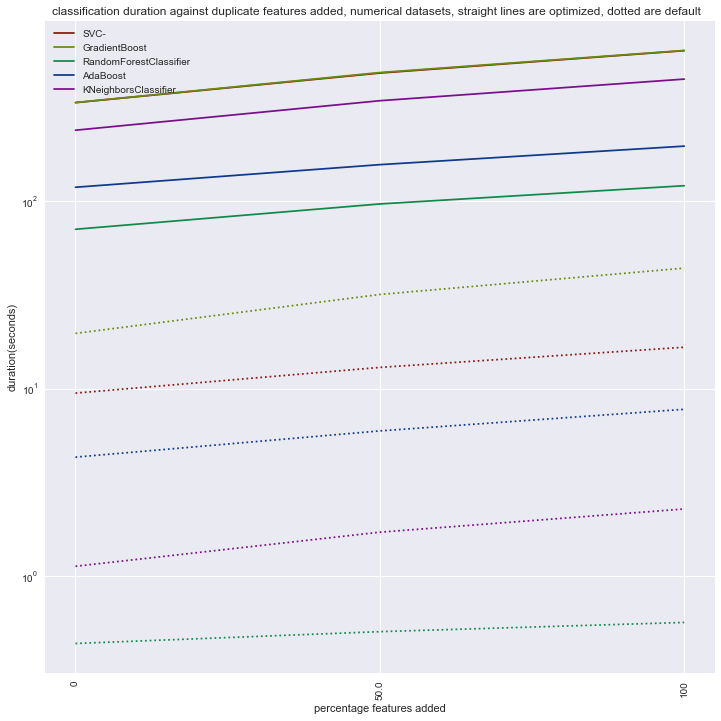

In [31]:
#print duration increase
didList = [11,
 1038,
 1043,
 1049,
 1050,
 37,
 1063,
 39,
 40,
 41,
 1067,
 1068,
 40496,
 53,
 54,
 1464,
 1467,
 40509,
 458,
 1510,
 1515]
# clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf', 'GaussianNB', 'BernoulliNB']
clfNames = ['SVC-','GradientBoost','RandomForestClassifier', 'AdaBoost','KNeighborsClassifier']
func = 'cvScoreFeatures5'
func2 = 'cvOptScoreFeatures5'
dur1 = []
dur2 = []
dur3 = []
typ = 0
fig, ax = plt.subplots()
amountList = [0.5,1] 
for i,x in enumerate(clfNames):
    dur1.append([]) 
    dur2.append([])
    dur3.append([])
    for j,x in enumerate(amountList):
        dur1[i].append(0) 
        dur2[i].append(0)
        dur3[i].append(0)
    dur2[i].append(0)
    dur3[i].append(0)
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if clfName == 'SVC-':
                clfName = 'SVC-rbf'
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)                
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))
            if clfName == 'SVC-rbf':
                clfName = 'SVC-'
            dur3[cs][i+1] = dur3[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur3[cs][0] = dur3[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur3[cs][i+1] = dur3[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur3[cs][0] = dur3[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))
            


cl = sns.hls_palette(len(dur2), l=.3, s=.8)
for i,x in enumerate(amountList):
    amountList[i] = x*100
amountList2 = copy(amountList)
amountList.insert(0,0)
x_axis = amountList
for i in range(0,len(dur2)):
#     _= ax.scatter(x_axis,dur1[i], label = clfNames[i],color = cl[i] )
    _= ax.plot(x_axis,dur2[i], color = cl[i],ls = ':' )
    _= ax.plot(x_axis,dur3[i], color = cl[i],label = clfNames[i] )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title('classification duration against duplicate features added, numerical datasets, straight lines are optimized, dotted are default  ')
_=plt.ylabel('duration(seconds)')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4' or func == 'cvScoreFeatures5':
    _=plt.xlabel('percentage features added')
elif func == 'cvScoreFeatures1':
    _=plt.xlabel('features removed')
#_=plt.yscale("log", nonposy='clip')
fig.set_figheight(12)
fig.set_figwidth(12)
ax.set_yscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

### analysis duration increase
Gradient and SVC are overlapping as having nearly the same duration when optimizing. 

Most notable is the exponential increase of KNeighborsClassifier compared to the others as it overtakes AdaBoost in time and is nearing the time of GradientBoost and SVC. This increase can be explained as the optimizer increasing n_neighbors or the distance calculation mechanic.

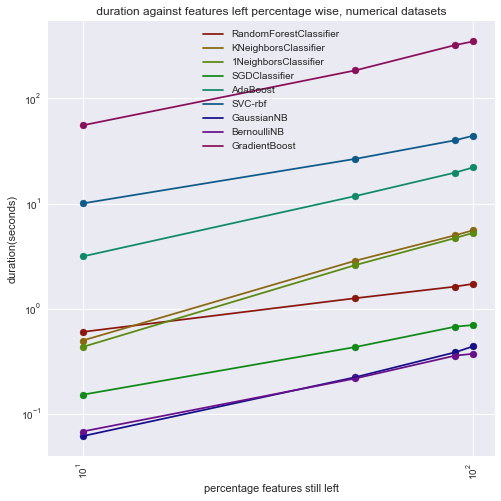

In [10]:
listDone = []
for did in NonCat:
    if readDict(did)['NumberOfFeatures'] > 30 and readDict(did)['NumberOfInstances'] < 100000:
        listDone.append(did)
func = 'removedFeatures'
didList = listDone
dur1 = []
dur2 = []
typ = 0

amountList = [0.1,0.5,0.9] 
for i,x in enumerate(clfNames):
    dur1.append([]) 
    dur2.append([])
    for j,x in enumerate(amountList):
        dur1[i].append(0) 
        dur2[i].append(0)
    dur2[i].append(0)
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))
fig, ax = plt.subplots()
cl = sns.hls_palette(len(dur2), l=.3, s=.8)
amountList = [1,0.9,0.5,0.1]
for i,x in enumerate(amountList):
    amountList[i] = x*100
x_axis = amountList
for i in range(0,len(dur2)):
    _= ax.plot(x_axis,dur2[i], color = cl[i],label = clfNames[i] )
    ax.scatter(x_axis,dur2[i], color = cl[i] )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title(' duration against features left percentage wise, numerical datasets ')
_=plt.ylabel('duration(seconds)')
_=plt.xlabel('percentage features from the full dataset')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

#### duration 
Duration is calculated as classification and prediction time combined.
### Analysis duration features removed
For all classifiers a clear increase can be seen, but remarkable is the only slight increase for RandomForestClassifier as opposed to KNeighborsClassifier. This can be the influx of the features has a great effect on the prediction for KNeighborsClassifer as it has to make greater calculations 

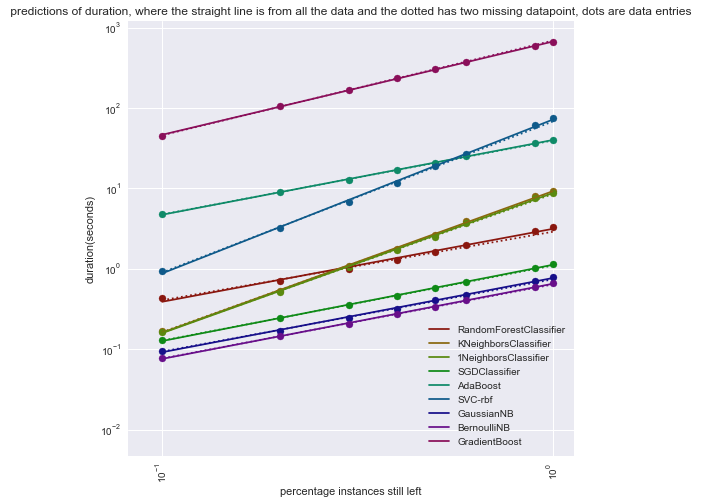

In [37]:
path = 'D:\\stack\\afstudeer\\results\\scalability\\1NeighborsClassifier'
listExtra = []
for did in didList:
    path = 'D:\\stack\\afstudeer\\results\\scalability\\1NeighborsClassifier\\' + str(did)    
    for (dirpath, dirnames, filenames) in os.walk(path):
        for dirname in dirnames:
            if dirname == '0.8':
                listExtra.append(did)

didList = listExtra
func = 'scalability'
# didList = listDone
dur1 = []
dur2 = []
typ = 0
amountList = [0.0,0.1,0.4,0.5,0.6,0.7,0.8,0.9] 
for i,x in enumerate(clfNames):
    dur1.append([]) 
    dur2.append([])
    for j,x in enumerate(amountList):
        dur1[i].append(0) 
        dur2[i].append(0)
    dur2[i].append(0)
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,did,amount)
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,amount)[typ]/len(didList)
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,amount)[typ+1]/len(didList)
predisComplete = []
# amountList = [1,0.9,0.5,0.1]
amountList = [1-i for i in amountList]
x_axis = amountList
for i,clfName in enumerate(clfNames):
    predisComplete.append(np.polyfit(np.log(x_axis),np.log(dur1[i]),1))
predisIncomplete = []
for i,clfName in enumerate(clfNames):
    predisIncomplete.append(np.polyfit(np.log(x_axis[2:]),np.log(dur1[i][2:]),1))
dur7 = []
for i,fit in enumerate(predisComplete):
    dur7.append([])
    for k,value in enumerate(x_axis):
        dur7[i].append(np.exp(fit[0]*np.log(value) + fit[1]))
dur8 = []
for i,fit in enumerate(predisIncomplete):
    dur8.append([])
    for k,value in enumerate(x_axis):
        dur8[i].append(np.exp(fit[0]*np.log(value) + fit[1]))
cl = sns.hls_palette(len(dur1), l=.3, s=.8)
fig, ax = plt.subplots()
for i in range(0,len(dur1)):
    _= ax.plot(x_axis,dur7[i], color = cl[i],label = clfNames[i] )
    _= ax.plot(x_axis,dur8[i], color = cl[i],ls = ':' )
    _= ax.scatter(x_axis,dur1[i], color = cl[i] )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title(' predictions of duration, where the straight line is from all the data and the dotted has two missing datapoint, dots are data entries ')
_=plt.ylabel('duration(seconds)')
_=plt.xlabel('percentage instances still left')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

In [75]:
from sklearn.kernel_ridge import KernelRidge
listik = [953,
6,
60,
46,
4538,
4534,
44,
4135,
4134,
40706,
40702,
40697,
40696,
40695,
40687,
40680,
40677,
40670,
40668,
40664,
40656,
40655,
40654,
40653,
40652,
40651,
40650,
40649,
40648,
40647,
40646,
40645,
1022,
1036,
1038,
1043,
1049,
1050,
1067,
1068,
1120,
1176,
12,
1461,
1466,
1468,
1475,
1476]


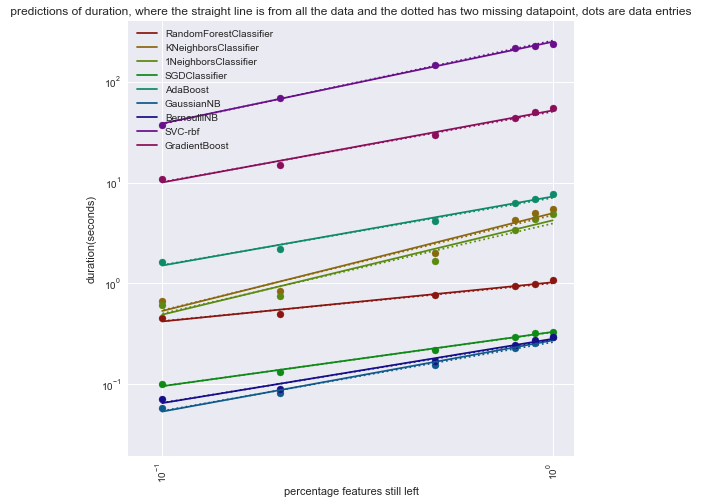

In [76]:
path = 'D:\\stack\\afstudeer\\results\\removedFeatures\\1NeighborsClassifier'
clfNames = [ 'RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'GaussianNB', 'BernoulliNB']
clfNames.append('SVC-rbf')
clfNames.append('GradientBoost')

listA = []
for (dirpath, dirnames, filenames) in os.walk(path):
    for dirname in dirnames:
        if float(dirname) > 2:
            listA.append(int(dirname))
didList = listik
func = 'removedFeatures'
# didList = listDone
dur1 = []
dur2 = []
typ = 2
ty = 0
amountList = [0.1,0.2,0.5,0.8,0.9] 
for i,x in enumerate(clfNames):
    dur1.append([]) 
    for j,x in enumerate(amountList):
        dur1[i].append(0) 
    dur1[i].append(0)
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))
            dur1[cs][0] = dur1[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[ty]/len(didList)/len(amountList)
            dur1[cs][0] = dur1[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[ty+1]/len(didList)/len(amountList)

            dur1[cs][i+1] = dur1[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/len(didList)
            dur1[cs][i+1] = dur1[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/len(didList)
predisComplete = []
amountList.append(0.0)
amountList.sort()
amountList = [1.0-i for i in amountList]
x_axis = amountList
for i,clfName in enumerate(clfNames):
    predisComplete.append(np.polyfit(np.log(x_axis),np.log(dur1[i]),1))
predisIncomplete = []
for i,clfName in enumerate(clfNames):
    predisIncomplete.append(np.polyfit(np.log(x_axis[1:]),np.log(dur1[i][1:]),1))
dur7 = []
for i,fit in enumerate(predisComplete):
    dur7.append([])
    for k,value in enumerate(x_axis):
        dur7[i].append(np.exp(fit[0]*np.log(value) + fit[1]))
dur8 = []
for i,fit in enumerate(predisIncomplete):
    dur8.append([])
    for k,value in enumerate(x_axis):
        dur8[i].append(np.exp(fit[0]*np.log(value) + fit[1]))
cl = sns.hls_palette(len(dur1), l=.3, s=.8)
fig, ax = plt.subplots()
for i in range(0,len(dur1)):
    _= ax.plot(x_axis,dur7[i], color = cl[i],label = clfNames[i] )
    _= ax.plot(x_axis,dur8[i], color = cl[i],ls = ':' )
    _= ax.scatter(x_axis,dur1[i], color = cl[i] )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title(' predictions of duration, where the straight line is from all the data and the dotted has two missing datapoint, dots are data entries ')
_=plt.ylabel('duration(seconds)')
_=plt.xlabel('percentage features still left')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

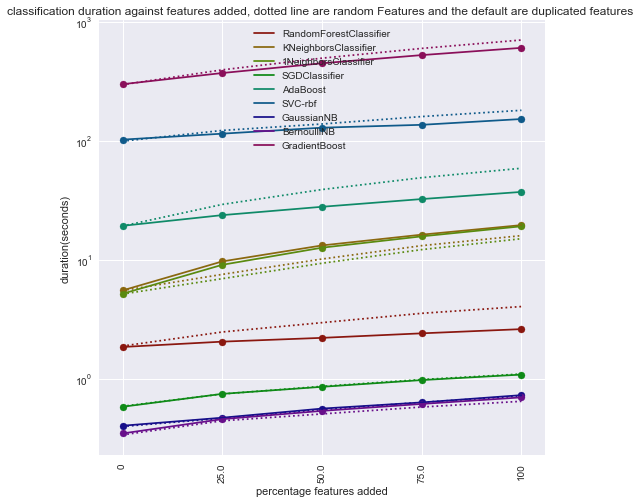

In [13]:
amountList = [0.25,0.5,0.75,1] 
cl = sns.hls_palette(len(dur2), l=.3, s=.8)
fig, ax = plt.subplots()
for i,x in enumerate(amountList):
    amountList[i] = x*100
amountList2 = copy(amountList)
amountList.insert(0,0)
x_axis = amountList
for i in range(0,len(dur2)):
#     _= ax.scatter(x_axis,dur1[i], label = clfNames[i],color = cl[i] )
    _= ax.plot(x_axis,dur2[i], color = cl[i],label = clfNames[i] )
    _= ax.scatter(x_axis,dur2[i], color = cl[i] )
    _= ax.plot(x_axis,dur3[i], color = cl[i],ls = ':' )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title('classification duration against features added, dotted line are random Features and the default are duplicated features ')
_=plt.ylabel('duration(seconds)')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4' or func == 'cvScoreFeatures5':
    _=plt.xlabel('percentage features added')
elif func == 'cvScoreFeatures1':
    _=plt.xlabel('features removed')
#_=plt.yscale("log", nonposy='clip')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
# ax.set_xscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

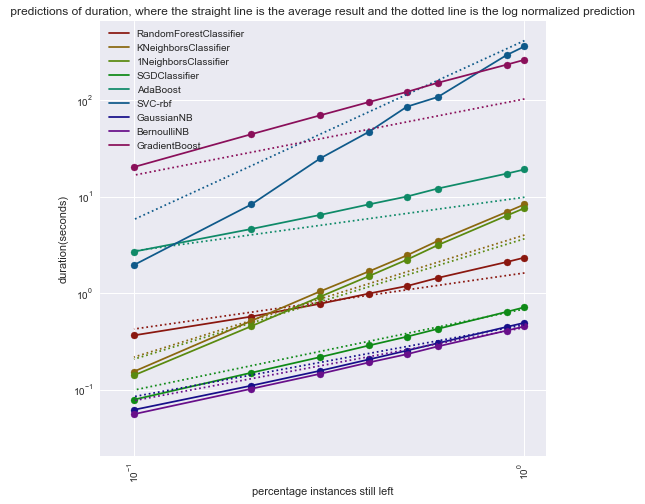

In [3]:
from sklearn.kernel_ridge import KernelRidge
from preamble import *
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
func = 'scalability'
dur90 = []
dur9 = []
list_of_files = []
for (dirpath, dirnames, filenames) in os.walk('C:\\Users\\S127788\\Documents\\GitHub\\assignment2\did'):
    for filename in filenames:
        if filename.endswith('cat.csv'): 
            list_of_files.append(int(filename[:-7]))
listExtra = []
list_of_files.remove(1177)
for did in list_of_files:
    path = 'D:\\stack\\afstudeer\\results\\scalability\\1NeighborsClassifier\\' + str(did)    
    for (dirpath, dirnames, filenames) in os.walk(path):
        for dirname in dirnames:
            if dirname == '0.8':
                listExtra.append(did)
dur1 = []
typ = 0
didList = listExtra
amountList2 = [0.0,0.1,0.4,0.5,0.6,0.7,0.8,0.9] 
for i,x in enumerate(clfNames):
    dur1.append([]) 
    for j,x in enumerate(amountList2):
        dur1[i].append(0) 
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList2):
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,did,amount)
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,amount)[typ]/len(didList)
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,amount)[typ+1]/len(didList)
didList = listExtra
for k,clfName in enumerate(clfNames):
    amountList = [0.0,0.1,0.4,0.7,0.8,0.9] 
    y_train = []
    X_train = []
    y_test = []
    X_test = []
    for did in didList:
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,did,amount)
            y_train.append(np.log(read_duration(func,clfName,did,amount)[typ]+read_duration(func,clfName,did,amount)[typ+1]))
#             X_train.append([np.log(1-amount),readDict(did)['NumberOfInstances'],readDict(did)['NumberOfFeatures'],did,readDict(did)['NumberOfNumericFeatures'],np.log((1-amount)*readDict(did)['NumberOfInstances'])])
            X_train.append(features(did,amount))
    lr = KernelRidge(alpha = 0.1)
    lr.fit(X_train,y_train)
    amountList = amountList2  
    for did in didList:
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,did,amount)
            y_test.append(np.log(read_duration(func,clfName,did,amount)[typ]+read_duration(func,clfName,did,amount)[typ+1]))
#             X_test.append([np.log(1-amount),readDict(did)['NumberOfInstances'],readDict(did)['NumberOfFeatures'],did,readDict(did)['NumberOfNumericFeatures'],np.log((1-amount)*readDict(did)['NumberOfInstances'])])
            X_test.append(features(did,amount))
    predictionLine = lr.predict(X_test)
    dur9.append([])
    for gluk in amountList:
        dur9[k].append(0)
    for i,ka in enumerate(X_test):
        for j,amount in enumerate(amountList):
            if np.log(1-amount) == ka[0]:
                dur9[k][j] = dur9[k][j] + np.exp(predictionLine[i])/len(didList)
    dur90.append([])
    for gluk in amountList:
        dur90[k].append(0)
    for i,ka in enumerate(X_test):
        for j,amount in enumerate(amountList):
            if np.log(1-amount) == ka[0]:
                dur90[k][j] = dur90[k][j] + np.exp(y_test[i])/len(didList)
amountList = [1-i for i in amountList]
cl = sns.hls_palette(len(dur1), l=.3, s=.8)

x_axis = amountList
fig, ax = plt.subplots()
for i in range(0,len(dur9)):
    _= ax.plot(x_axis,dur90[i], color = cl[i],label = clfNames[i] )
    _= ax.plot(x_axis,dur9[i], color = cl[i],ls = ':' )
    _= ax.scatter(x_axis,dur1[i], color = cl[i] )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title(' predictions of duration, where the straight line is the average result and the dotted line is the log normalized prediction ')
_=plt.ylabel('duration(seconds)')
_=plt.xlabel('percentage instances still left')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

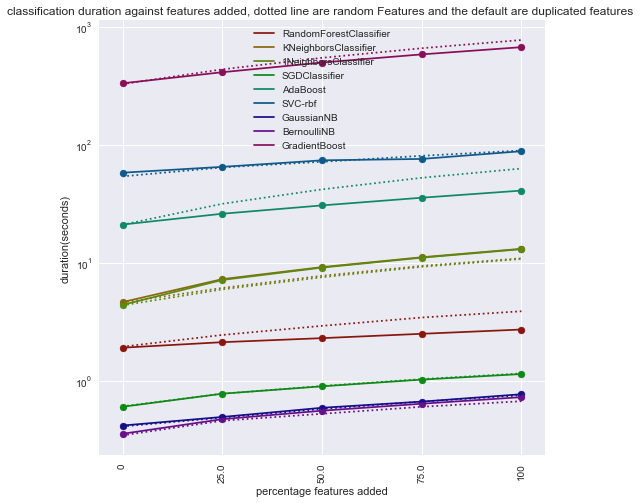

In [12]:
func = 'cvScoreFeatures5'
func2 = 'cvScoreFeatures4'
dur1 = []
dur2 = []
dur3 = []
typ = 0
didList = [991,
959,
953,
6,
60,
40706,
40702,
40697,
40696,
40695,
40687,
40680,
40678,
40677,
40670,
40664,
40656,
40655,
40654,
40653,
40652,
40651,
40650,
40649,
40648,
40647,
40646,
40645,
312,
23,
184,
182,
1022,
1036]
didList = NonCat
amountList = [0.25,0.5,0.75,1] 
for i,x in enumerate(clfNames):
    dur1.append([]) 
    dur2.append([])
    dur3.append([])
    for j,x in enumerate(amountList):
        dur1[i].append(0) 
        dur2[i].append(0)
        dur3[i].append(0)
    dur2[i].append(0)
    dur3[i].append(0)
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            if not checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func2,clfName,amount,did)
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur3[cs][i+1] = dur3[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur3[cs][0] = dur3[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))
            dur3[cs][i+1] = dur3[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur3[cs][0] = dur3[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))


cl = sns.hls_palette(len(dur2), l=.3, s=.8)
fig, ax = plt.subplots()
for i,x in enumerate(amountList):
    amountList[i] = x*100
amountList2 = copy(amountList)
amountList.insert(0,0)
x_axis = amountList
for i in range(0,len(dur2)):
#     _= ax.scatter(x_axis,dur1[i], label = clfNames[i],color = cl[i] )
    _= ax.plot(x_axis,dur2[i], color = cl[i],label = clfNames[i] )
    ax.scatter(x_axis,dur2[i], color = cl[i] )
    _= ax.plot(x_axis,dur3[i], color = cl[i],ls = ':' )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title('classification duration against features added, dotted line are random Features and the default are duplicated features ')
_=plt.ylabel('duration(seconds)')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4' or func == 'cvScoreFeatures5':
    _=plt.xlabel('percentage features added')
elif func == 'cvScoreFeatures1':
    _=plt.xlabel('features removed')
#_=plt.yscale("log", nonposy='clip')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
# ax.set_xscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

### analysis more features
For GradientBoost, RandomForest and AdaBoos there is clear increase in prediction time
For KNN there is a decrease in prediction duration. For numerical 

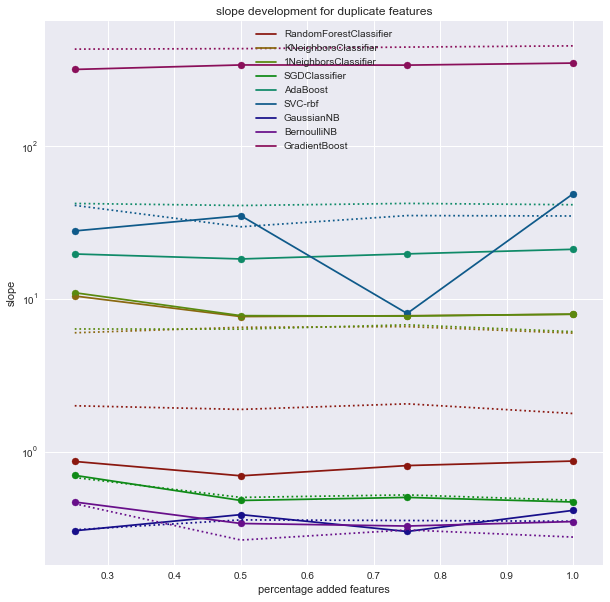

In [34]:
slopeDup = []
slopeRand = []
amountList2 = []
for i in amountList:
    amountList2.append(i/100)
for i,item in enumerate(dur2):
    slopeDup.append([])
    slopeRand.append([])
    for j,itemz in enumerate(item):
        if j == 0:
            count = 0
        else:
            slopeDup[i].append((dur2[i][j]-dur2[i][j-1])/(amountList2[j]-amountList2[j-1]))
            slopeRand[i].append((dur3[i][j]-dur3[i][j-1])/(amountList2[j]-amountList2[j-1]))

fig, ax = plt.subplots()
cl = sns.hls_palette(len(slopeDup), l=.3, s=.8)
for i,x in enumerate(slopeDup):
    ax.plot(amountList2[1:],slopeDup[i],label = clfNames[i],color= cl[i])
    ax.scatter(amountList2[1:],slopeDup[i],color= cl[i])
    ax.plot(amountList2[1:],slopeRand[i],ls = ':',color= cl[i])
plt.xlabel('percentage added features')
plt.ylabel('slope')
plt.title('slope development for duplicate features')
fig.set_figheight(10)
fig.set_figwidth(10)
ax.set_yscale("log", nonposy='clip')
plt.legend()
plt.show()

In [5]:
for i,item in enumerate(dur2):
    print(item[0],dur3[i][0])

1.9095607996110926 1.9475505737052865
4.648027522647066 4.613888095779864
4.397333492256223 4.357779424352217
0.6037467847555149 0.6091376927306834
21.063361246575752 20.986393120555654
57.86616004603338 53.86377744881117
0.418887265382742 0.4117827693157361
0.356690360796706 0.3457999006855576
330.53266717173665 325.5986653135481


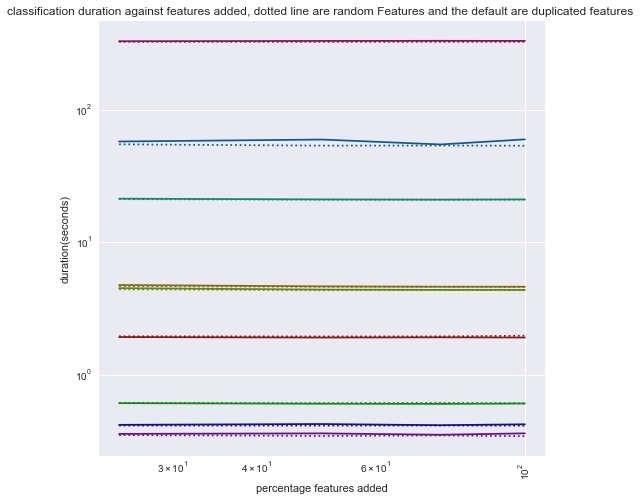

In [8]:
didList = []#Cat
for i in NonCat:
    didList.append(i)
# clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf', 'GaussianNB', 'BernoulliNB']
func = 'cvScoreFeatures5'
func2 = 'cvScoreFeatures4'
dur1 = []
dur2 = []
dur3 = []
dur4 = []
typ = 0

amountList = [0.25,0.5,0.75,1] 
for i,x in enumerate(clfNames):
    dur1.append([]) 
    dur2.append([])
    dur3.append([])
    dur4.append([])
    for j,x in enumerate(amountList):
        dur1[i].append(0) 
        dur2[i].append(0)
        dur3[i].append(0)
        dur4[i].append(0)
    dur2[i].append(0)
    dur3[i].append(0)
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            if not checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func2,clfName,amount,did)
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur3[cs][i+1] = dur3[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur3[cs][0] = dur3[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))
            dur3[cs][i+1] = dur3[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur3[cs][0] = dur3[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))
            dur4[cs][i] = dur4[cs][i] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/len(didList)
            dur4[cs][i] = dur4[cs][i] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/len(didList)

cl = sns.hls_palette(len(dur2), l=.3, s=.8)
fig, ax = plt.subplots()
for i,x in enumerate(amountList):
    amountList[i] = x*100
amountList2 = copy(amountList)
amountList.insert(0,0)
x_axis = amountList
for i in range(0,len(dur2)):
#     _= ax.scatter(x_axis,dur1[i], label = clfNames[i],color = cl[i] )
#     _= ax.plot(x_axis,dur2[i], color = cl[i],label = clfNames[i] )
#     _= ax.plot(x_axis,dur3[i], color = cl[i],ls = ':' )
    _= ax.plot(x_axis[1:],dur1[i], color = cl[i] )
    _= ax.plot(x_axis[1:],dur4[i], color = cl[i],ls = ':' )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title('classification duration against features added, dotted line are random Features and the default are duplicated features ')
_=plt.ylabel('duration(seconds)')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4' or func == 'cvScoreFeatures5':
    _=plt.xlabel('percentage features added')
elif func == 'cvScoreFeatures1':
    _=plt.xlabel('features removed')
#_=plt.yscale("log", nonposy='clip')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

In [28]:
amountList = [0.25,0.5,0.75,1] 
comp1 = []
comp2 = []
for j,did in enumerate(didList):
    comp1.append([])
    comp2.append([])
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            if not checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func2,clfName,amount,did)
            
            comp1[j].append(read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ])
            comp2[j].append(read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ])
            

In [15]:
diff2 = []
for i,item in enumerate(dur3):
    diff2.append([])
    for j,itemz in enumerate(item):
        diff2[i].append(abs(dur3[i][j]-dur2[i][j])/max(dur3[i][j],dur2[i][j]))

In [36]:
diffs = []
for i,item in enumerate(comp1):
    diffs.append((abs(sum(comp1[i])-sum(comp2[i])))/max(sum(comp1[i]),sum(comp2[i])))

In [25]:
print(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))

cvScoreFeatures5 RandomForestClassifier 1038 0


In [48]:
checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))
checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))

cvScoreFeatures5 cvScoreFeatures4


In [62]:
from preamble import *
list_of_files = []
for (dirpath, dirnames, filenames) in os.walk('C:\\Users\\S127788\\Documents\\GitHub\\assignment2\did'):
    for filename in filenames:
        if filename.endswith('cat.csv'): 
            list_of_files.append(int(filename[:-7]))

56

In [24]:
# print(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))

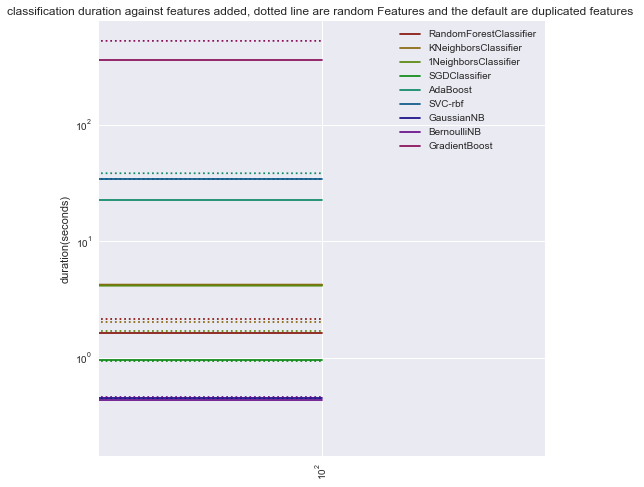

In [41]:
didList = [20, 21, 26, 333, 334, 335,40668]
didList = [12]
# for i in NonCat:
#     didList.append(i)
# clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf', 'GaussianNB', 'BernoulliNB']
func = 'cvScoreFeatures5Duration'
func2 = 'cvScoreFeatures4Duration'
dur1 = []
dur2 = []
dur3 = []
typ = 0

amountList = [1] 
for i,x in enumerate(clfNames):
    dur1.append([]) 
    dur2.append([])
    dur3.append([])
    for j,x in enumerate(amountList):
        dur1[i].append(0) 
        dur2[i].append(0)
        dur3[i].append(0)
    dur2[i].append(0)
    dur3[i].append(0)
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            if not checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func2,clfName,amount,did)
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur3[cs][i+1] = dur3[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur3[cs][0] = dur3[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))
            dur3[cs][i+1] = dur3[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur3[cs][0] = dur3[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))


cl = sns.hls_palette(len(dur2), l=.3, s=.8)
fig, ax = plt.subplots()
for i,x in enumerate(amountList):
    amountList[i] = x*100
amountList2 = copy(amountList)
amountList.insert(0,0)
x_axis = amountList
for i in range(0,len(dur2)):
#     _= ax.scatter(x_axis,dur1[i], label = clfNames[i],color = cl[i] )
    _= ax.plot(x_axis,dur2[i], color = cl[i],label = clfNames[i] )
    _= ax.plot(x_axis,dur3[i], color = cl[i],ls = ':' )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title('classification duration against features added, dotted line are random Features and the default are duplicated features ')
_=plt.ylabel('duration(seconds)')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4' or func == 'cvScoreFeatures5':
    _=plt.xlabel('percentage features added')
elif func == 'cvScoreFeatures1':
    _=plt.xlabel('features removed')
#_=plt.yscale("log", nonposy='clip')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

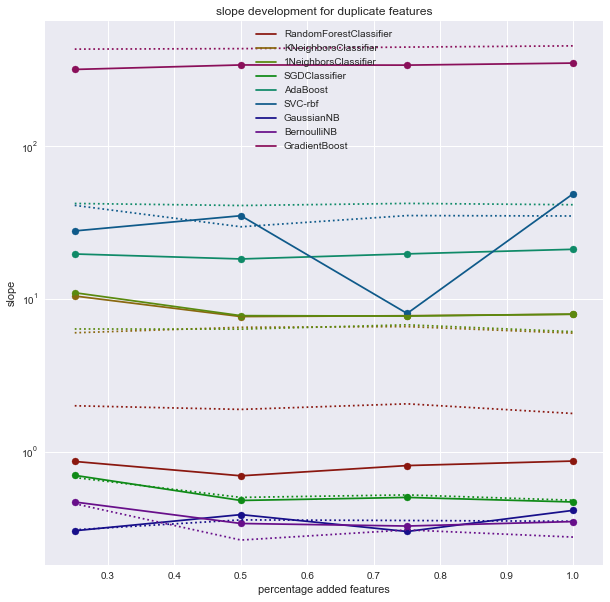

In [33]:
slopeDup = []
slopeRand = []
amountList2 = []
for i in amountList:
    amountList2.append(i/100)
for i,item in enumerate(dur2):
    slopeDup.append([])
    slopeRand.append([])
    for j,itemz in enumerate(item):
        if j == 0:
            count = 0
        else:
            slopeDup[i].append((dur2[i][j]-dur2[i][j-1])/(amountList2[j]-amountList2[j-1]))
            slopeRand[i].append((dur3[i][j]-dur3[i][j-1])/(amountList2[j]-amountList2[j-1]))

fig, ax = plt.subplots()
cl = sns.hls_palette(len(slopeDup), l=.3, s=.8)
for i,x in enumerate(slopeDup):
    ax.plot(amountList2[1:],slopeDup[i],label = clfNames[i],color= cl[i])
    ax.scatter(amountList2[1:],slopeDup[i],color= cl[i])
    ax.plot(amountList2[1:],slopeRand[i],ls = ':',color= cl[i])
plt.xlabel('percentage added features')
plt.ylabel('slope')
plt.title('slope development for duplicate features')
fig.set_figheight(10)
fig.set_figwidth(10)
ax.set_yscale("log", nonposy='clip')
plt.legend()
plt.show()
# fig, ax = plt.subplots()
# cl = sns.hls_palette(len(listCatAR2), l=.3, s=.8)
# for i,x in enumerate(listCatAR2):
#     ax.plot(amountList,x,label = clfNames[i],color= cl[i])
# plt.xlabel('percentage added features')
# plt.ylabel('slope')features')
# fig.set_figheight(10)
# fig.set_figwidth(10)
# plt.legend()
# plt.show()

In [23]:
avg = 0
for i in didList:
    avg = avg + 

[0.25, 0.5, 0.75, 1.0]

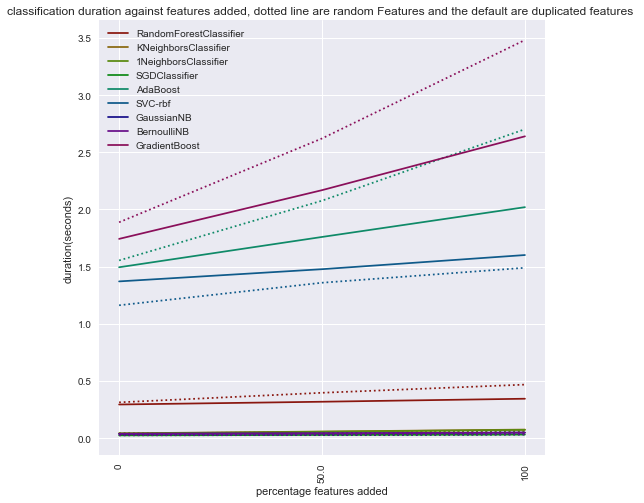

In [27]:
path = 'D:\\stack\\afstudeer\\results\\BiasVarianceSplited\\1NeighborsClassifier'
# clfNames = [ 'RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'GaussianNB', 'BernoulliNB']

listA = []
for (dirpath, dirnames, filenames) in os.walk(path):
    for dirname in dirnames:
        if float(dirname) > 2:
            listA.append(int(dirname))
# clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf', 'GaussianNB', 'BernoulliNB']
func = 'cvScoreFeatures5'
func2 = 'cvScoreFeatures4'
dur1 = []
dur2 = []
dur3 = []
typ = 0
didList = listA
didList.remove(1022)
didList.remove(1025)
didList = [1068]
amountList = [0.5,1] 
for i,x in enumerate(clfNames):
    dur1.append([]) 
    dur2.append([])
    dur3.append([])
    for j,x in enumerate(amountList):
        dur1[i].append(0) 
        dur2[i].append(0)
        dur3[i].append(0)
    dur2[i].append(0)
    dur3[i].append(0)
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            if not checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func2,clfName,amount,did)
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur3[cs][i+1] = dur3[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur3[cs][0] = dur3[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))
            dur3[cs][i+1] = dur3[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur3[cs][0] = dur3[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))


cl = sns.hls_palette(len(dur2), l=.3, s=.8)
fig, ax = plt.subplots()
for i,x in enumerate(amountList):
    amountList[i] = x*100
amountList2 = copy(amountList)
amountList.insert(0,0)
x_axis = amountList
for i in range(0,len(dur2)):
#     _= ax.scatter(x_axis,dur1[i], label = clfNames[i],color = cl[i] )
    _= ax.plot(x_axis,dur2[i], color = cl[i],label = clfNames[i] )
    _= ax.plot(x_axis,dur3[i], color = cl[i],ls = ':' )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title('classification duration against features added, dotted line are random Features and the default are duplicated features ')
_=plt.ylabel('duration(seconds)')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4' or func == 'cvScoreFeatures5':
    _=plt.xlabel('percentage features added')
elif func == 'cvScoreFeatures1':
    _=plt.xlabel('features removed')
#_=plt.yscale("log", nonposy='clip')
fig.set_figheight(8)
fig.set_figwidth(8)
# ax.set_yscale("log", nonposy='clip')
# ax.set_xscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

In [23]:
print(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))

cvScoreFeatures4 GradientBoost 1068 42


In [24]:
readDict(did)['NumberOfFeatures']-1

21

In [22]:
amount

2

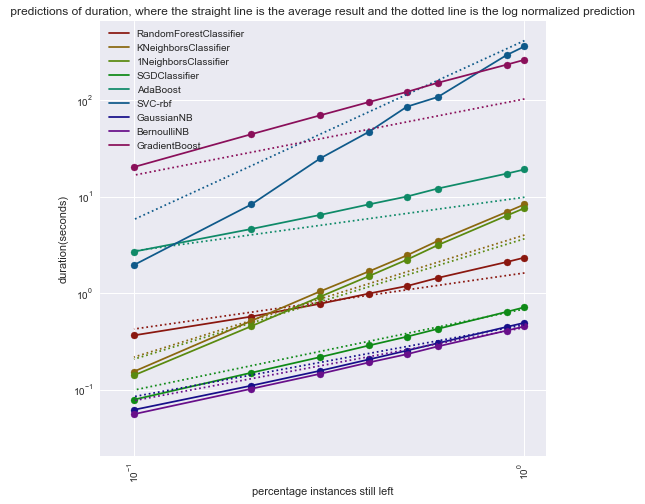

In [2]:
from sklearn.kernel_ridge import KernelRidge
from preamble import *
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
func = 'scalability'
dur90 = []
dur9 = []
list_of_files = []
for (dirpath, dirnames, filenames) in os.walk('C:\\Users\\S127788\\Documents\\GitHub\\assignment2\did'):
    for filename in filenames:
        if filename.endswith('cat.csv'): 
            list_of_files.append(int(filename[:-7]))
listExtra = []
list_of_files.remove(1177)
for did in list_of_files:
    path = 'D:\\stack\\afstudeer\\results\\scalability\\1NeighborsClassifier\\' + str(did)    
    for (dirpath, dirnames, filenames) in os.walk(path):
        for dirname in dirnames:
            if dirname == '0.8':
                listExtra.append(did)
dur1 = []
typ = 0
didList = listExtra
amountList2 = [0.0,0.1,0.4,0.5,0.6,0.7,0.8,0.9] 
for i,x in enumerate(clfNames):
    dur1.append([]) 
    for j,x in enumerate(amountList2):
        dur1[i].append(0) 
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList2):
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,did,amount)
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,amount)[typ]/len(didList)
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,amount)[typ+1]/len(didList)
didList = listExtra
for k,clfName in enumerate(clfNames):
    amountList = [0.0,0.1,0.4,0.7,0.8,0.9] 
    y_train = []
    X_train = []
    y_test = []
    X_test = []
    for did in didList:
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,did,amount)
            y_train.append(np.log(read_duration(func,clfName,did,amount)[typ]+read_duration(func,clfName,did,amount)[typ+1]))
#             X_train.append([np.log(1-amount),readDict(did)['NumberOfInstances'],readDict(did)['NumberOfFeatures'],did,readDict(did)['NumberOfNumericFeatures'],np.log((1-amount)*readDict(did)['NumberOfInstances'])])
            X_train.append(features(did,amount))
    lr = KernelRidge(alpha = 0.1)
    lr.fit(X_train,y_train)
    amountList = amountList2  
    for did in didList:
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,did,amount)
            y_test.append(np.log(read_duration(func,clfName,did,amount)[typ]+read_duration(func,clfName,did,amount)[typ+1]))
#             X_test.append([np.log(1-amount),readDict(did)['NumberOfInstances'],readDict(did)['NumberOfFeatures'],did,readDict(did)['NumberOfNumericFeatures'],np.log((1-amount)*readDict(did)['NumberOfInstances'])])
            X_test.append(features(did,amount))
    predictionLine = lr.predict(X_test)
    dur9.append([])
    for gluk in amountList:
        dur9[k].append(0)
    for i,ka in enumerate(X_test):
        for j,amount in enumerate(amountList):
            if np.log(1-amount) == ka[0]:
                dur9[k][j] = dur9[k][j] + np.exp(predictionLine[i])/len(didList)
    dur90.append([])
    for gluk in amountList:
        dur90[k].append(0)
    for i,ka in enumerate(X_test):
        for j,amount in enumerate(amountList):
            if np.log(1-amount) == ka[0]:
                dur90[k][j] = dur90[k][j] + np.exp(y_test[i])/len(didList)
amountList = [1-i for i in amountList]
cl = sns.hls_palette(len(dur1), l=.3, s=.8)

x_axis = amountList
fig, ax = plt.subplots()
for i in range(0,len(dur9)):
    _= ax.plot(x_axis,dur90[i], color = cl[i],label = clfNames[i] )
    _= ax.plot(x_axis,dur9[i], color = cl[i],ls = ':' )
    _= ax.scatter(x_axis,dur1[i], color = cl[i] )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title(' predictions of duration, where the straight line is the average result and the dotted line is the log normalized prediction ')
_=plt.ylabel('duration(seconds)')
_=plt.xlabel('percentage instances still left')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

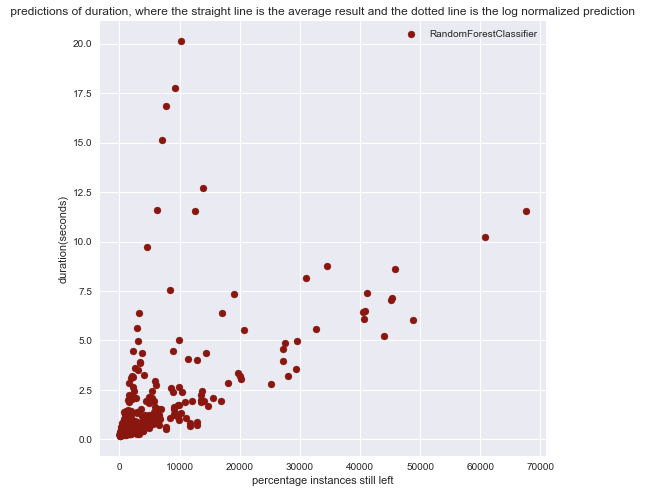

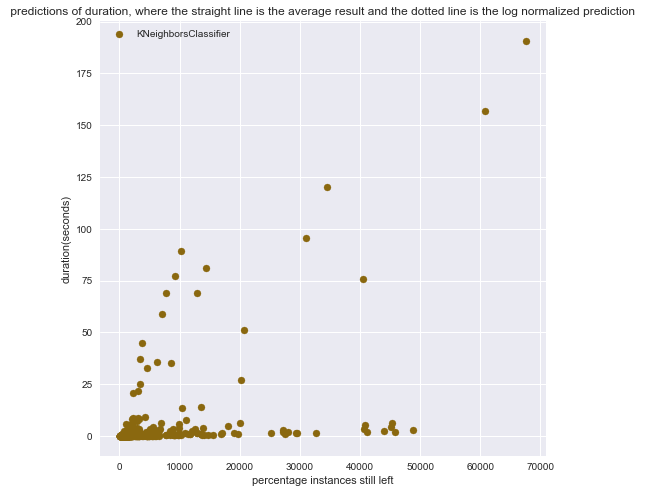

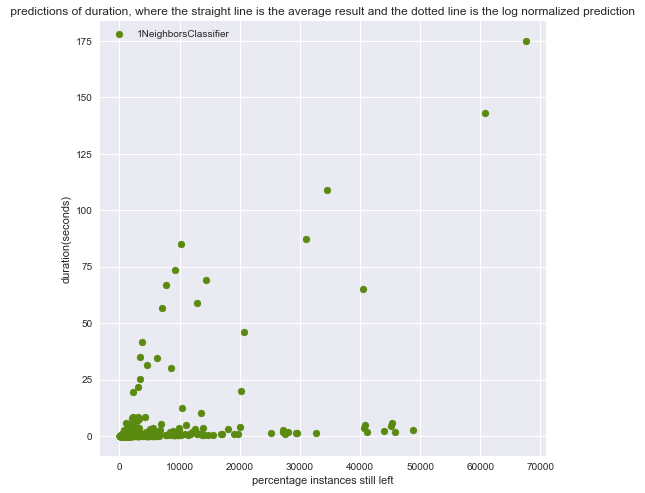

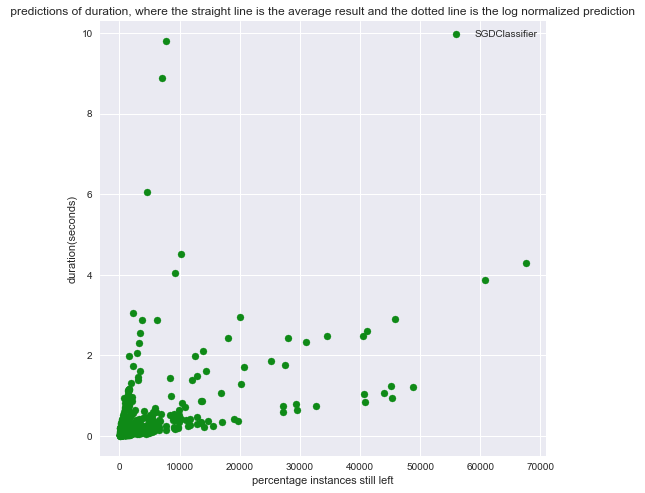

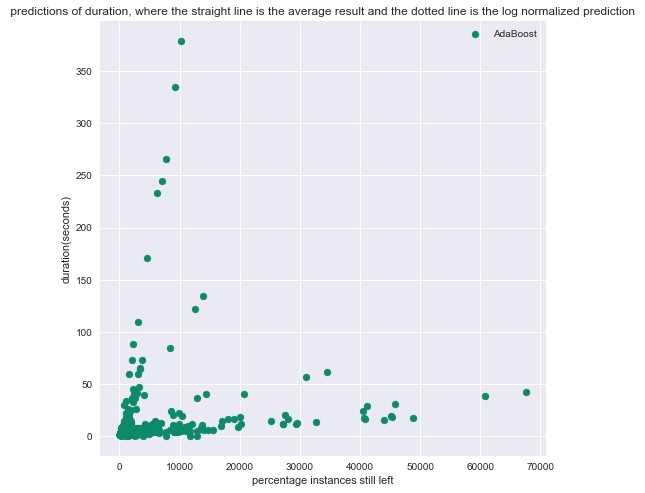

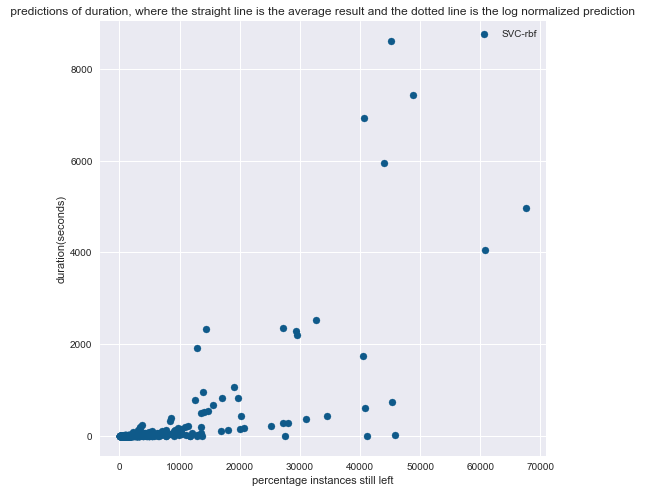

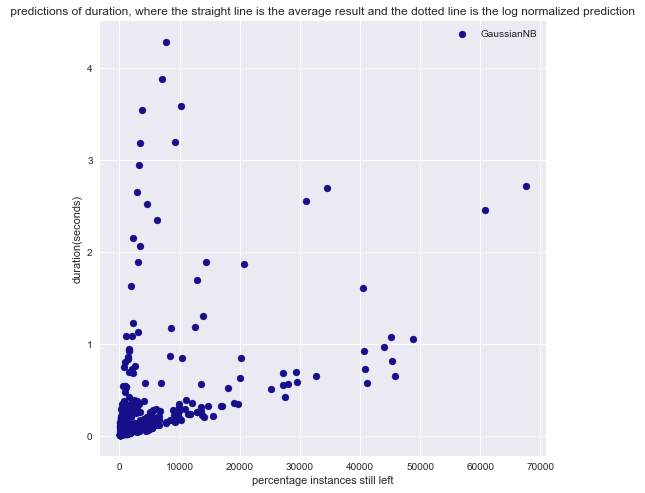

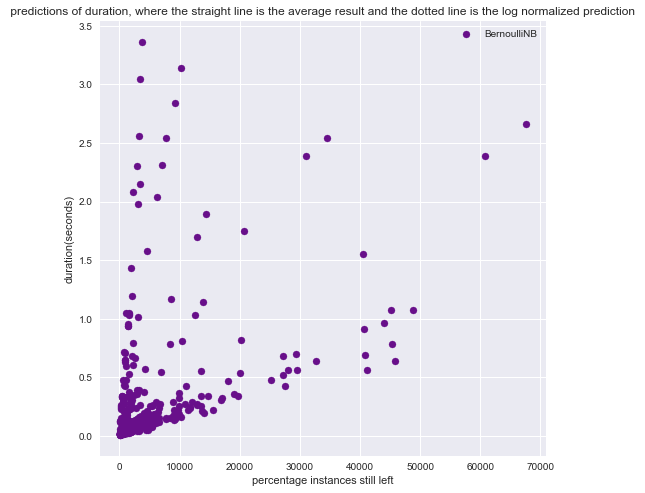

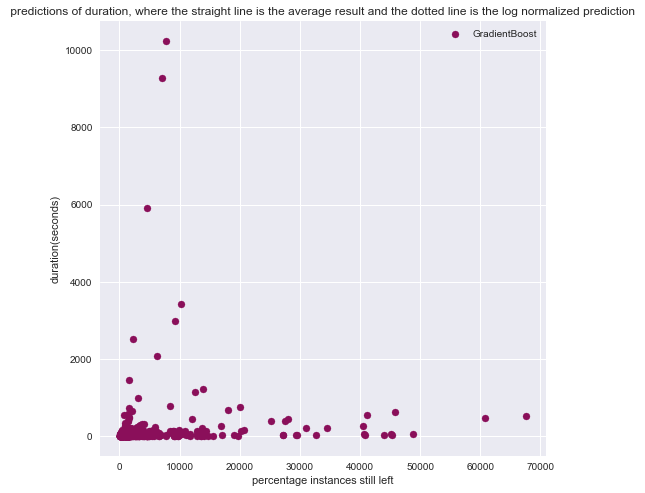

In [18]:
durationP = []
instancesP = []
for k in clfNames:
    durationP.append([])
    instancesP.append([])

for k,clfName in enumerate(clfNames):
    amountList = [0.0,0.1,0.4,0.7,0.8,0.9] 
    for did in didList:
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,did,amount)
            durationP[k].append(read_duration(func,clfName,did,amount)[typ]+read_duration(func,clfName,did,amount)[typ+1])
#             X_train.append([np.log(1-amount),readDict(did)['NumberOfInstances'],readDict(did)['NumberOfFeatures'],did,readDict(did)['NumberOfNumericFeatures'],np.log((1-amount)*readDict(did)['NumberOfInstances'])])
            instancesP[k].append(readDict(did)['NumberOfInstances']*(1-amount))
cl = sns.hls_palette(len(instancesP), l=.3, s=.8)
clfDur = 5
x_axis = amountList
for clfDur,clfName in enumerate(clfNames):
    fig, ax = plt.subplots()
    # for i in range(0,len(instancesP)):
    #     _= ax.scatter(instancesP[i],durationP[i], color = cl[i],label = clfNames[i] )
    _= ax.scatter(instancesP[clfDur],durationP[clfDur], color = cl[clfDur],label = clfNames[clfDur] )
    # _=plt.xticks(x_axis,amountList ,rotation='vertical')
    _=plt.title('duration of classification and prediction for instances ')
    _=plt.ylabel('duration(seconds)')
    _=plt.xlabel('amount of instances')
    fig.set_figheight(8)
    fig.set_figwidth(8)
    # ax.set_yscale("log", nonposy='clip')
    # ax.set_xscale("log", nonposy='clip')
    _=plt.legend()
    _=plt.show()

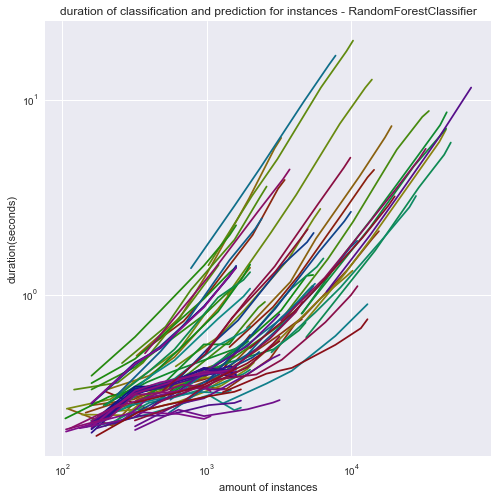

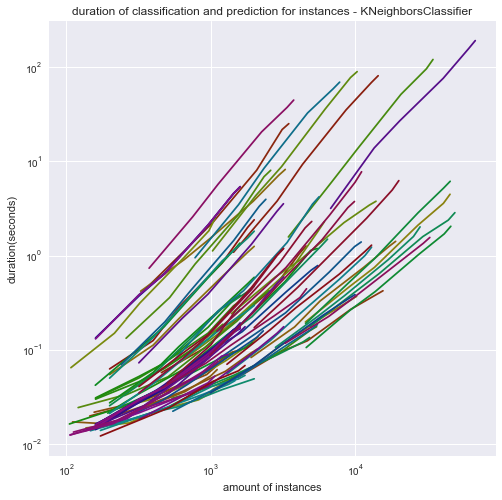

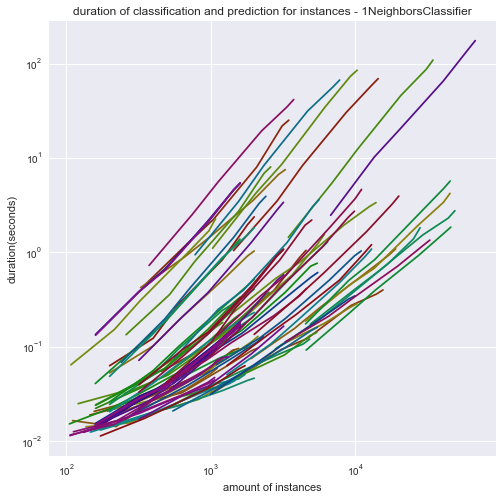

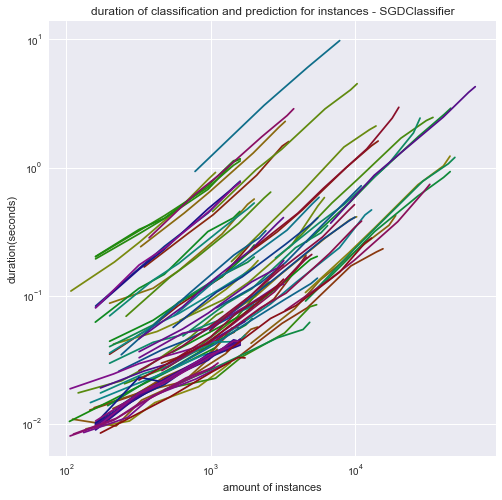

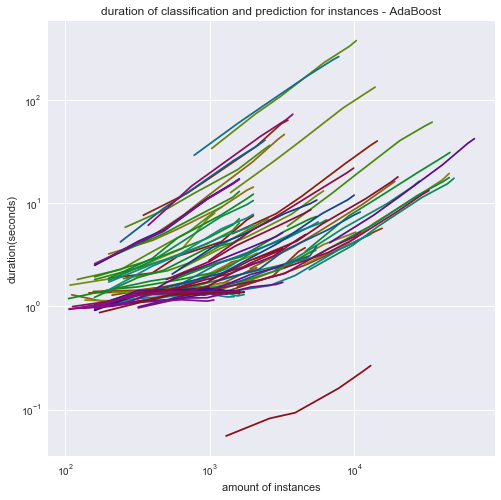

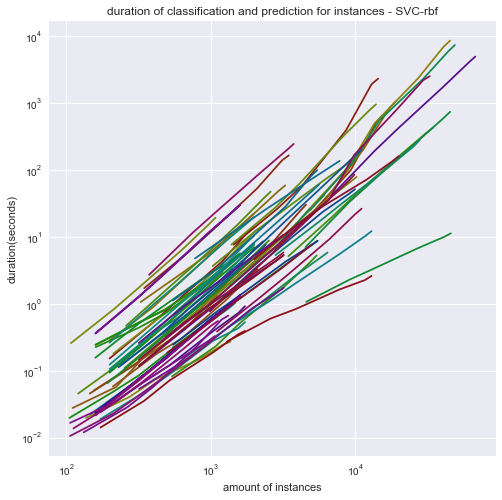

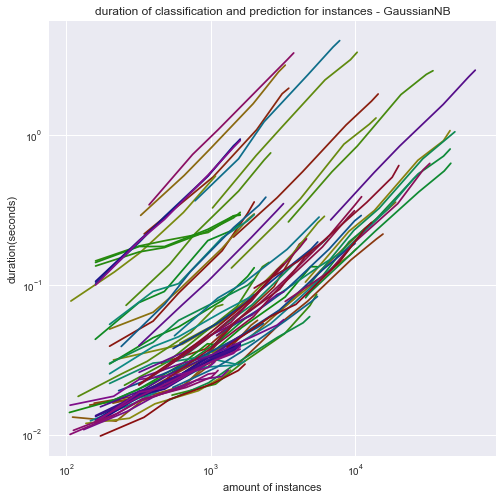

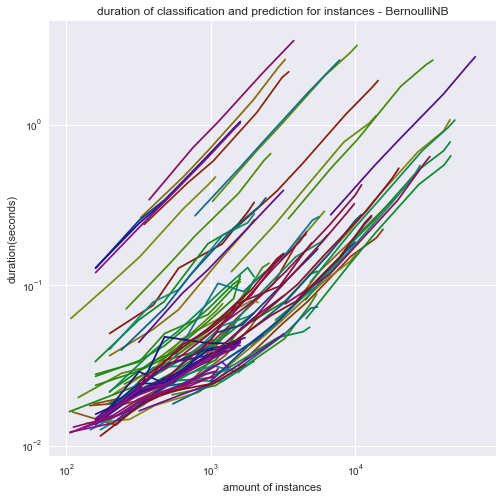

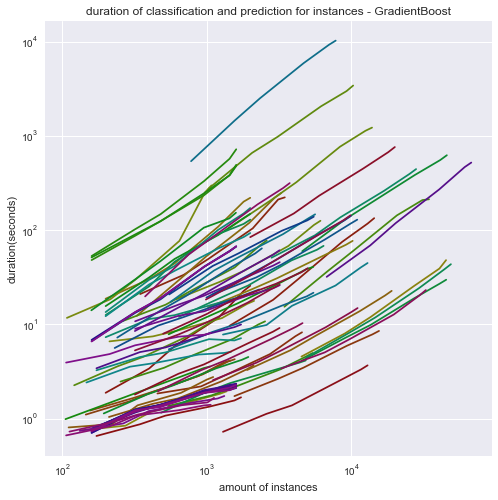

In [23]:
durationP = []
slopeP = []
instancesP = []


for k,clfName in enumerate(clfNames):
    durationP.append([])
    instancesP.append([])
    slopeP.append([])
    amountList = [0.0,0.1,0.4,0.7,0.8,0.9] 
    for j,did in enumerate(didList):
        durationP[k].append([])
        instancesP[k].append([])
        slopeP[k].append([])
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,did,amount)
                
            durationP[k][j].append(read_duration(func,clfName,did,amount)[typ]+read_duration(func,clfName,did,amount)[typ+1])
            if not amount == amountList[0]:
                slopeP[k][j].append(durationP)#EDIT HERE
                #edit here
#             X_train.append([np.log(1-amount),readDict(did)['NumberOfInstances'],readDict(did)['NumberOfFeatures'],did,readDict(did)['NumberOfNumericFeatures'],np.log((1-amount)*readDict(did)['NumberOfInstances'])])
            instancesP[k][j].append(readDict(did)['NumberOfInstances']*(1-amount))
cl = sns.hls_palette(len(instancesP[0]), l=.3, s=.8)
clfDur = 5
x_axis = amountList
for clfDur,clfName in enumerate(clfNames):
    fig, ax = plt.subplots()
    for i in range(0,len(instancesP[0])):
        _= ax.plot(instancesP[clfDur][i],durationP[clfDur][i], color = cl[i] )
#     _= ax.scatter(instancesP[clfDur],durationP[clfDur], color = cl[clfDur],label = clfNames[clfDur] )
    # _=plt.xticks(x_axis,amountList ,rotation='vertical')
    _=plt.title('duration of classification and prediction for instances - '+ clfName)
    _=plt.ylabel('duration(seconds)')
    _=plt.xlabel('amount of instances')
    fig.set_figheight(8)
    fig.set_figwidth(8)
    ax.set_yscale("log", nonposy='clip')
    ax.set_xscale("log", nonposy='clip')
    _=plt.legend()
    _=plt.show()

In [3]:
from auto_ml import Predictor
from auto_ml.utils import get_boston_dataset
df_train, df_test = get_boston_dataset()

column_descriptions = {
    'MEDV': 'output',
    'CHAS': 'categorical'
}

ml_predictor = Predictor(type_of_estimator='classification')

ml_predictor.train(df_train)

Welcome to auto_ml! We're about to go through and make sense of your data using machine learning, and give you a production-ready pipeline to get predictions with.

If you have any issues, or new feature ideas, let us know at http://auto.ml
You are running on version 2.9.10
Now using the model training_params that you passed in:
{}
After overwriting our defaults with your values, here are the final params that will be used to initialize the model:
{'presort': False, 'learning_rate': 0.1, 'warm_start': True}
Running basic data cleaning
Fitting DataFrameVectorizer
Now using the model training_params that you passed in:
{}
After overwriting our defaults with your values, here are the final params that will be used to initialize the model:
{'presort': False, 'learning_rate': 0.1, 'warm_start': True}


********************************************************************************************
About to fit the pipeline for the model GradientBoostingRegressor to predict MEDV
Started at:
2018

[241] random_holdout_set_from_training_data's score is: -3.788
[244] random_holdout_set_from_training_data's score is: -3.789
[247] random_holdout_set_from_training_data's score is: -3.79
[250] random_holdout_set_from_training_data's score is: -3.791
[255] random_holdout_set_from_training_data's score is: -3.787
[260] random_holdout_set_from_training_data's score is: -3.785
[265] random_holdout_set_from_training_data's score is: -3.778
[270] random_holdout_set_from_training_data's score is: -3.781
[275] random_holdout_set_from_training_data's score is: -3.78
[280] random_holdout_set_from_training_data's score is: -3.792
[285] random_holdout_set_from_training_data's score is: -3.79
[290] random_holdout_set_from_training_data's score is: -3.792
[295] random_holdout_set_from_training_data's score is: -3.788
[300] random_holdout_set_from_training_data's score is: -3.789
[305] random_holdout_set_from_training_data's score is: -3.789
[310] random_holdout_set_from_training_data's score is: -3

In [27]:
from LocalDatasets import read_did
X,y = read_did(10)
listStr = []
for i in X[0]:
    listStr.append('k' + str(i))
DicX = []
for i,item in enumerate(X):
    DicX.append([])    
    for j,feat in enumerate(X[i]):
        DicX[i].append({listStr[j] : X[i][j]})
    DicX[i].append({'target' : y[i]})
column_descriptions = {
    'target': 'output'
}
ml_predictor = Predictor(type_of_estimator='classification',column_descriptions = column_descriptions)
ml_predictor.train(DicX)

Welcome to auto_ml! We're about to go through and make sense of your data using machine learning, and give you a production-ready pipeline to get predictions with.

If you have any issues, or new feature ideas, let us know at http://auto.ml
You are running on version 2.9.10


KeyError: 'target'

In [13]:
listStr = []
for i in X[0]:
    listStr.append('k' + str(i))

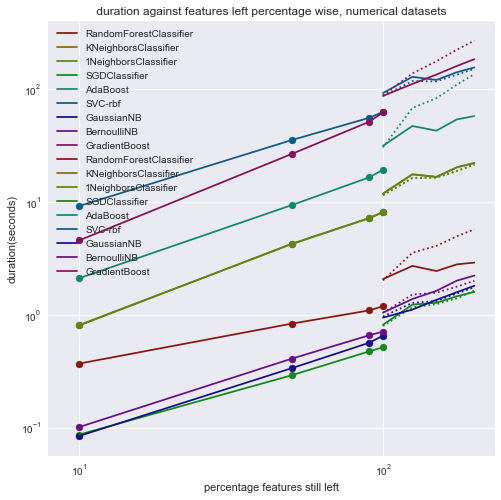

In [21]:
didList = Cat
for i in NonCat:
    didList.append(i)
listDone = []
for did in NonCat:
    if readDict(did)['NumberOfFeatures'] > 30 and readDict(did)['NumberOfInstances'] < 100000:
        listDone.append(did)

setsThatMatter = []
for i in listDone:
    if i in didList:
        setsThatMatter.append(i)
     
        
func = 'removedFeatures'
didList = setsThatMatter
durLess = []
typ = 0

amountList = [0.1,0.5,0.9] 
for i,x in enumerate(clfNames): 
    durLess.append([])
    for j,x in enumerate(amountList): 
        durLess[i].append(0)
    durLess[i].append(0)
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            durLess[cs][i+1] = durLess[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            durLess[cs][0] = durLess[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            durLess[cs][i+1] = durLess[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            durLess[cs][0] = durLess[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))
            

amountList = [1,0.9,0.5,0.1]
for i,x in enumerate(amountList):
    amountList[i] = x*100
x_axisLess = amountList

func = 'cvScoreFeatures5'
func2 = 'cvScoreFeatures4'
durDup = []
durRand = []
typ = 0
amountList = [0.25,0.5,0.75,1] 
for i,x in enumerate(clfNames):
    durDup.append([])
    durRand.append([])
    for j,x in enumerate(amountList):
        durDup[i].append(0)
        durRand[i].append(0)
    durDup[i].append(0)
    durRand[i].append(0)
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            if not checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func2,clfName,amount,did)
            durDup[cs][i+1] = durDup[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            durDup[cs][0] = durDup[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            durRand[cs][i+1] = durRand[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            durRand[cs][0] = durRand[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            durDup[cs][i+1] = durDup[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            durDup[cs][0] = durDup[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))
            durRand[cs][i+1] = durRand[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            durRand[cs][0] = durRand[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))

for i,x in enumerate(amountList):
    amountList[i] = x*100
amountList2 = copy(amountList)
amountList.insert(0,0)
x_axis = amountList
for i,item in enumerate(x_axis):
    x_axis[i] = x_axis[i] + 100


fig, ax = plt.subplots()
cl = sns.hls_palette(len(durLess), l=.3, s=.8)
for i in range(0,len(durLess)):
    _= ax.plot(x_axisLess,durLess[i], color = cl[i],label = clfNames[i] )
    ax.scatter(x_axisLess,durLess[i], color = cl[i] )
for i in range(0,len(durDup)):
    _= ax.plot(x_axis,durDup[i], color = cl[i],label = clfNames[i] )
    _= ax.plot(x_axis,durRand[i], color = cl[i],ls = ':' )
    
# _=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title(' duration against features left percentage wise, numerical datasets ')
_=plt.ylabel('duration(seconds)')
_=plt.xlabel('percentage features still left')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

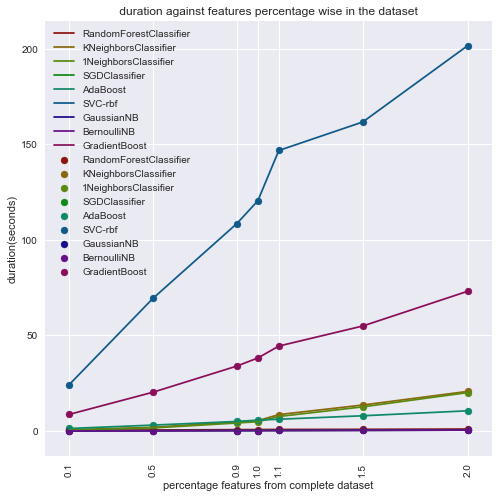

In [32]:
from LocalDatasets import doneFracs

func = 'FeatureManipulation'
didList = DoneFeatureMan(func,'1NeighborsClassifier',[0.1,0.5,0.9,1.1,2.0])
durLess = []
typ = 0

amountList = [0.1,0.5,0.9,1.0,1.1,1.5,2.0]
# amountList = [0.9,1.0]
for i,x in enumerate(clfNames): 
    durLess.append([])
    for j,x in enumerate(amountList): 
        durLess[i].append(0)
#     durLess[i].append(0)
for i,amount in enumerate(amountList):
    if amount == 1.0:
        middle = i
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not amount == 1.0:
                if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                    print(func,clfName,amount,did)
                durLess[cs][i] = durLess[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
                durLess[cs][middle] = durLess[cs][middle] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*(len(amountList)-1))
                durLess[cs][i] = durLess[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
                durLess[cs][middle] = durLess[cs][middle] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*(len(amountList)-1))
            


amountList2 = copy(amountList)
for i,x in enumerate(amountList2):
    amountList2[i] = x*100
x_axisLess = amountList2
fig, ax = plt.subplots()
cl = sns.hls_palette(len(durLess), l=.3, s=.8)
for i in range(0,len(durLess)):
    _= ax.plot(x_axisLess,durLess[i], color = cl[i],label = clfNames[i] )
    ax.scatter(x_axisLess,durLess[i], color = cl[i], label = clfNames[i] )
_=plt.xticks(x_axisLess,amountList ,rotation='vertical')
_=plt.title(' duration against features percentage wise in the dataset ')
_=plt.ylabel('duration(seconds)')
_=plt.xlabel('percentage features from complete dataset')
fig.set_figheight(8)
fig.set_figwidth(8)
# ax.set_yscale("log", nonposy='clip')
# ax.set_xscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

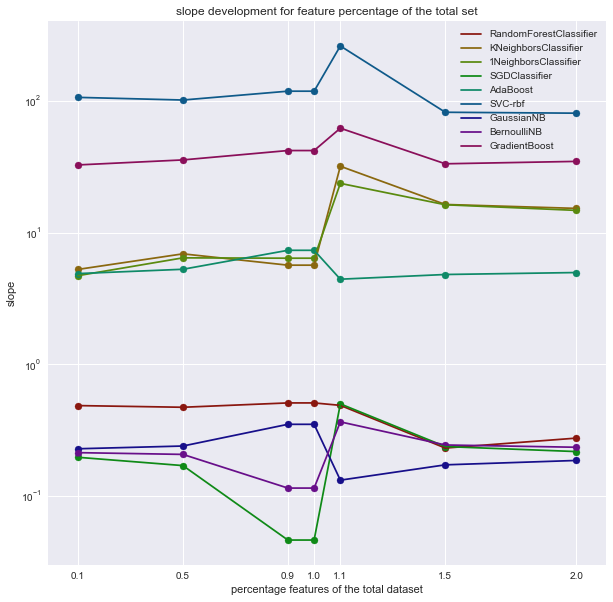

In [56]:
# slopeDup = []
# slopeRand = []
# amountList2 = []
# for i in x_axisLess:
#     amountList2.append(i/100)
# for i,item in enumerate(durLess):
#     slopeDup.append([])
#     slopeRand.append([])
#     for j,itemz in enumerate(item):
#         if j == 0:
#             count = 0
#         else:
#             slopeDup[i].append((durLess[i][j]-durLess[i][j-1])/(amountList2[j]-amountList2[j-1]))
#         if middle == j:
#             slopeRand[i].append(abs((durLess[i][j]-durLess[i][j-1])/(amountList2[j]-amountList2[j-1])))
#         else:
#             slopeRand[i].append(abs((durLess[i][j]-durLess[i][middle])/(amountList2[j]-amountList2[middle])))

fig, ax = plt.subplots()
cl = sns.hls_palette(len(slopeDup), l=.3, s=.8)
for i,x in enumerate(slopeDup):
#     ax.plot(amountList2[1:],slopeDup[i],label = clfNames[i],color= cl[i])
#     ax.scatter(amountList2[1:],slopeDup[i],color= cl[i])
    ax.scatter(amountList2,slopeRand[i],color= cl[i])
    ax.plot(amountList2,slopeRand[i],label = clfNames[i],color= cl[i])
plt.xticks(amountList2,amountList2)
# plt.xticks(amountList2[1:],amountList2[1:])
plt.xlabel('percentage features of the total dataset')
plt.ylabel('slope')
plt.title('slope development for feature percentage of the total set')
fig.set_figheight(10)
fig.set_figwidth(10)
ax.set_yscale("log", nonposy='clip')
plt.legend()
plt.show()

In [3]:

didList = Cat
for i in NonCat:
    didList.append(i)
# clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf', 'GaussianNB', 'BernoulliNB']
func = 'cvScoreFeatures5'
func2 = 'cvScoreFeatures4'
classfeat5 = []
classfeat4 = []
predfeat5 = []
predfeat4 = []
typ = 0

amount = 0.25
clfName = 'RandomForestClassifier'
for did in didList:
    if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
        print(func,clfName,amount,did)
    if not checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
        print(func2,clfName,amount,did)
    classfeat5.append(read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ])
    classfeat4.append(read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ])
    predfeat5.append(read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1])
    predfeat4.append(read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1])




In [4]:
diff = []
for i,item in enumerate(classfeat5):
    diff.append((classfeat5[i]-classfeat4[i])/classfeat4[i])

In [25]:
print(amount)
amount = 0.9
print(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))
read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))

1.0
FeatureManipulation GradientBoost 1022 216


[12.197893532678677,
 0.014733909715801019,
 10.95529260946877,
 0.013628476391545519]

In [36]:
sum(diff)

-3.1594549762151924

In [20]:
for i,item in enumerate(dur2):
    print(dur2[0][i],dur3[0][i])

1.832822412441806 1.8655551798036965
2.0245786246213777 2.5347734933119925
2.169568064675643 3.0439810187551863
2.372806323096603 3.6971071064403556
2.569159613289588 4.242009997971709
0 0
0 0
0 0
0 0
0 0


IndexError: list index out of range

In [6]:
listie = []
for i,item in enumerate(diff):
    if item > 0.1 or item < -0.1:
        print(didList[i],diff[i],classfeat5[i])
        listie.append(didList[i])

21 0.13351141916055334 0.31240996588951475
469 -0.1694407827498547 0.22544986178399995
1067 -0.13277834406605069 0.384057271261554
1479 -0.12742831135313723 1.2365490573574789
1489 0.3926758681013439 1.0723191343149665
1494 -0.1296538623373248 0.30412857111514313
1497 -0.14382181548055786 1.1209256478468888
1504 -0.2988201581258397 0.45558803949097637
1510 -0.42152220631025306 0.2534270251853741
1515 -0.280550351643442 0.5726114153439994
1570 0.19986253879172153 0.5845877543451934
16 -0.11335594120146407 1.13898805899953
18 -0.11541346650841951 0.3630955629851087
22 -0.14339353498298604 0.9830707171931863
30 -0.13869352370077975 1.0544699324454996
37 -0.2089005372018873 0.22658741765189916
39 -0.15023176213724396 0.19936154819151852
40 -0.1673850280179397 0.21711327036609873
458 -0.14293697076888864 0.28891740761173423
54 -0.14431431597056713 0.29383758244512137
1067 -0.13277834406605069 0.384057271261554
1479 -0.12742831135313723 1.2365490573574789
1489 0.3926758681013439 1.0723191343

In [8]:

print(read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
print(read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))

[0.29383758244512137, 0.01574623897613492, 0.29079880184144713, 0.015580631472403184]
[0.34339429527608445, 0.01852416833571624, 0.3501524515450001, 0.017819756372773554]


In [15]:
from LocalDatasets import checkForExistFile,read_did_pred
# func = 
# clfName = 
amount2 = 0.25
amount = round(amount2*(readDict(did)['NumberOfFeatures']-1))
# did = 
name = 'duration'
Ramount = checkForExistFile(func,clfName,did,amount) - 1
print(read_did_pred(func,clfName,did,amount,name + str(Ramount)))
Ramount = checkForExistFile(func2,clfName,did,amount) - 1
print(read_did_pred(func2,clfName,did,amount,name + str(Ramount)))

[[0.29383758244512137, 0.01574623897613492, 0.29079880184144713, 0.015580631472403184]]
[[0.34339429527608445, 0.01852416833571624, 0.3501524515450001, 0.017819756372773554]]


In [24]:
didList = []
for i in NonCat:
    didList.append(i)
# clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf', 'GaussianNB', 'BernoulliNB']
func = 'cvScoreFeatures5Duration'
func2 = 'cvScoreFeatures4Duration'
dur1 = []
dur2 = []
dur3 = []
typ = 0

amountList = [0.25,0.5,0.75,1] 
for i,x in enumerate(clfNames):
    dur1.append([]) 
    dur2.append([])
    dur3.append([])
    for j,x in enumerate(amountList):
        dur1[i].append(0) 
        dur2[i].append(0)
        dur3[i].append(0)
    dur2[i].append(0)
    dur3[i].append(0)
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            if not checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func2,clfName,amount,did)
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur3[cs][i+1] = dur3[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur3[cs][0] = dur3[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))
            dur3[cs][i+1] = dur3[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur3[cs][0] = dur3[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))




for i,x in enumerate(amountList):
    amountList[i] = x*100
amountList2 = copy(amountList)
amountList.insert(0,0)
x_axis = amountList
cl = sns.hls_palette(len(dur2), l=.3, s=.8)
fig, ax = plt.subplots()
for i in range(0,len(dur2)):
#     _= ax.scatter(x_axis,dur1[i], label = clfNames[i],color = cl[i] )
    _= ax.plot(x_axis,dur2[i], color = cl[i],label = clfNames[i] )
    _= ax.plot(x_axis,dur3[i], color = cl[i],ls = ':' )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title('classification duration against features added, dotted line are random Features and the default are duplicated features ')
_=plt.ylabel('duration(seconds)')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4' or func == 'cvScoreFeatures5':
    _=plt.xlabel('percentage features added')
elif func == 'cvScoreFeatures1':
    _=plt.xlabel('features removed')
#_=plt.yscale("log", nonposy='clip')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

IndexError: list index out of range

In [25]:
print(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))

cvScoreFeatures5Duration RandomForestClassifier 1038 242


In [2]:
readDict(53)

{'MajorityClassSize': 150,
 'MaxNominalAttDistinctValues': -1,
 'MinorityClassSize': 120,
 'NumberOfClasses': 2,
 'NumberOfFeatures': 14,
 'NumberOfInstances': 270,
 'NumberOfInstancesWithMissingValues': 0,
 'NumberOfMissingValues': 0,
 'NumberOfNumericFeatures': 13,
 'NumberOfSymbolicFeatures': 1,
 'did': 53,
 'format': 'ARFF',
 'name': 'heart-statlog',
 'status': 'active'}

In [10]:
from LocalDatasets import DoneFeatureMan
didList = DoneFeatureMan(func,'1NeighborsClassifier',[0.1])
print(didList)

[40706, 6, 10, 1036, 1038, 1043, 22, 1176, 1049, 1050, 31, 4134, 1063, 40, 1067, 1068, 44, 46, 53, 4534, 54, 953, 4538, 826, 60, 40645, 40646, 40647, 40648, 40649, 40650, 40651, 40652, 40653, 40654, 40655, 40656, 458, 40664, 40668, 40670, 478, 1120, 40677, 40680, 40686, 40687, 40702, 40695, 40696, 40697, 1022]


In [7]:
didList

[]

In [17]:
len(x_axisLess[0])

TypeError: object of type 'float' has no len()

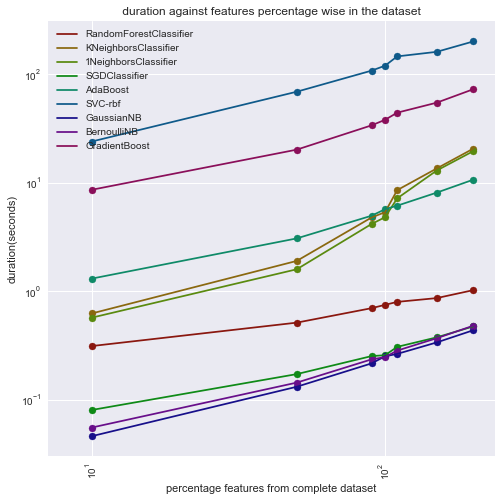

In [51]:
# from LocalDatasets import doneFracs

# func = 'FeatureManipulation'
# didList = DoneFeatureMan(func,'1NeighborsClassifier',[0.1,0.5,0.9,1.1,2.0])
# durLess = []
# typ = 0

# amountList = [0.1,0.5,0.9,1.0,1.1,1.5,2.0]
# # amountList = [0.9,1.0]
# for i,x in enumerate(clfNames): 
#     durLess.append([])
#     for j,x in enumerate(amountList): 
#         durLess[i].append(0)
# #     durLess[i].append(0)
# for i,amount in enumerate(amountList):
#     if amount == 1.0:
#         middle = i
# for did in didList:
#     for cs,clfName in enumerate(clfNames):
#         for i,amount in enumerate(amountList):
#             if not amount == 1.0:
#                 if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
#                     print(func,clfName,amount,did)
#                 durLess[cs][i] = durLess[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
#                 durLess[cs][middle] = durLess[cs][middle] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*(len(amountList)-1))
#                 durLess[cs][i] = durLess[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
#                 durLess[cs][middle] = durLess[cs][middle] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*(len(amountList)-1))
            


# amountList2 = copy(amountList)
# for i,x in enumerate(amountList2):
#     amountList2[i] = x*100
# x_axisLess = amountList2
fig, ax = plt.subplots()
cl = sns.hls_palette(len(durLess), l=.3, s=.8)
for i in range(0,len(durLess)):
    _= ax.plot(x_axisLess,durLess[i], color = cl[i],label = clfNames[i] )
    ax.scatter(x_axisLess,durLess[i], color = cl[i] )
_=plt.xticks(x_axisLess,amountList ,rotation='vertical')
_=plt.title(' duration against features percentage wise in the dataset ')
_=plt.ylabel('duration(seconds)')
_=plt.xlabel('percentage features from complete dataset')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

In [22]:
from LocalDatasets import DoneExperiments
func = 'cvScoreFeatures4Duration'
done = DoneExperiments(func,clfNames[0])
didListC = []
for i in done:
    for j in i:
        didListC.append(j)
kaas = []
for did in didListC:
    if did in Cat:
        kaas.append(did)

In [18]:
print(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))

cvScoreFeatures4 GradientBoost 1022 60


In [21]:
didListC

[1014,
 1022,
 1025,
 1038,
 1043,
 1046,
 1049,
 1050,
 1063,
 1067,
 1068,
 1120,
 1176,
 11,
 12,
 1459,
 1462,
 1464,
 1466,
 1467,
 1468,
 1475,
 1476,
 1478,
 1479,
 1485,
 1487,
 1489,
 1491,
 1492,
 1493,
 1494,
 1495,
 1497,
 14,
 1501,
 1504,
 1510,
 1515,
 1570,
 164,
 16,
 184,
 18,
 20,
 21,
 22,
 23499,
 26,
 28,
 300,
 30,
 32,
 333,
 334,
 335,
 336,
 36,
 375,
 37,
 39,
 40499,
 40509,
 40668,
 40,
 4134,
 4135,
 41,
 44,
 4534,
 4538,
 458,
 469,
 46,
 50,
 53,
 54]

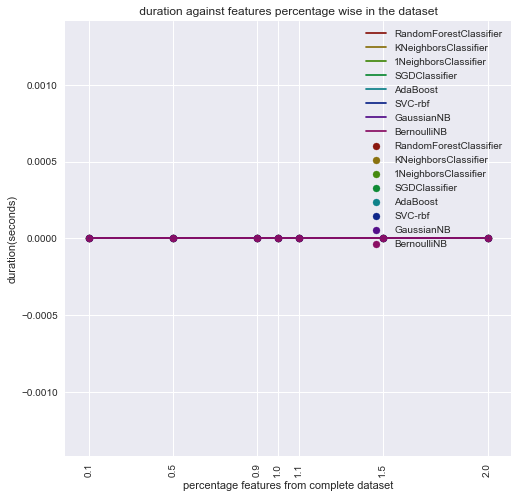

In [27]:
from LocalDatasets import doneFracs,DoneFeatureMan

func = 'FeatureManipulation'
didListCom = DoneFeatureMan(func,'1NeighborsClassifier',[0.1,0.5,0.9,1.1,2.0])
didList = []
for did in didList:
    if readDict(did)['NumberOfSymbolicFeatures'] == readDict(did)['NumberOfFeatures']:
        didList.append(did)
durLess = []
typ = 0

amountList = [0.1,0.5,0.9,1.0,1.1,1.5,2.0]
# amountList = [0.9,1.0]
for i,x in enumerate(clfNames): 
    durLess.append([])
    for j,x in enumerate(amountList): 
        durLess[i].append(0)
#     durLess[i].append(0)
for i,amount in enumerate(amountList):
    if amount == 1.0:
        middle = i
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not amount == 1.0:
                if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                    print(func,clfName,amount,did)
                durLess[cs][i] = durLess[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
                durLess[cs][middle] = durLess[cs][middle] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*(len(amountList)-1))
                durLess[cs][i] = durLess[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
                durLess[cs][middle] = durLess[cs][middle] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*(len(amountList)-1))
            


amountList2 = copy(amountList)
for i,x in enumerate(amountList2):
    amountList2[i] = x*100
x_axisLess = amountList2
fig, ax = plt.subplots()
cl = sns.hls_palette(len(durLess), l=.3, s=.8)
for i in range(0,len(durLess)):
    _= ax.plot(x_axisLess,durLess[i], color = cl[i],label = clfNames[i] )
    ax.scatter(x_axisLess,durLess[i], color = cl[i], label = clfNames[i] )
_=plt.xticks(x_axisLess,amountList ,rotation='vertical')
_=plt.title(' duration against features percentage wise in the dataset ')
_=plt.ylabel('duration(seconds)')
_=plt.xlabel('percentage features from complete dataset')
fig.set_figheight(8)
fig.set_figwidth(8)
# ax.set_yscale("log", nonposy='clip')
# ax.set_xscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

In [29]:
didListCom

[40706,
 6,
 10,
 1036,
 1038,
 1043,
 22,
 1176,
 1049,
 1050,
 31,
 4134,
 1063,
 40,
 1067,
 1068,
 44,
 46,
 53,
 4534,
 54,
 953,
 4538,
 826,
 60,
 40645,
 40646,
 40647,
 40648,
 40649,
 40650,
 40651,
 40652,
 40653,
 40654,
 40655,
 40656,
 458,
 40664,
 40668,
 40670,
 478,
 1120,
 40677,
 40680,
 40686,
 40687,
 40702,
 40695,
 40696,
 40697,
 1022]

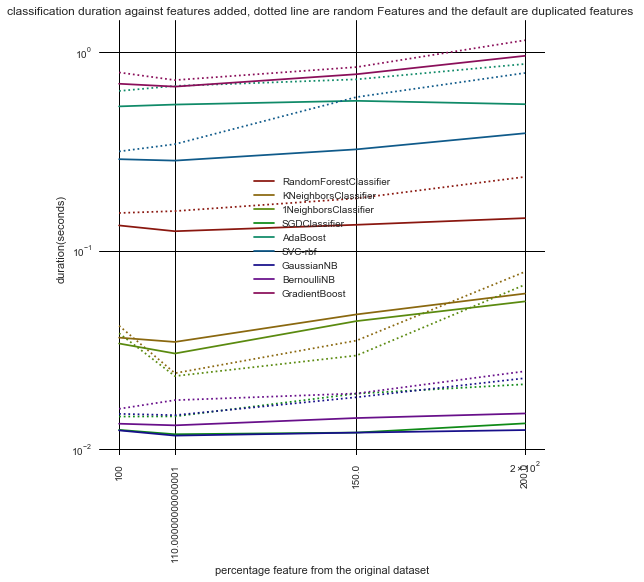

In [87]:
from LocalDatasets import DoneFeatureMan,read_durationMax

func = 'FeatureManipulation'
func2 = 'FeatureRandom'
clfName = clfNames[0]
amountList = [1.1,1.5,2.0]
funcMan = DoneFeatureMan(func,clfName,amountList)
func2Man = DoneFeatureMan(func2,clfName,amountList)
intersect = []
for did in funcMan:
    if did in func2Man:
        intersect.append(did)
didList = intersect
# didList.remove(1014)
# for i in NonCat:
#     didList.append(i)

# clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf', 'GaussianNB', 'BernoulliNB']
# func = 'FeatureManipulation'
# func2 = 'FeatureRandom'
dur1 = []
dur2 = []
dur3 = []
typ = 0

for i,x in enumerate(clfNames):
    dur1.append([]) 
    dur2.append([])
    dur3.append([])
    for j,x in enumerate(amountList):
        dur1[i].append(0) 
        dur2[i].append(0)
        dur3[i].append(0)
    dur2[i].append(0)
    dur3[i].append(0)
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            if not checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func2,clfName,amount,did)
            funcDur[cs][i].append(read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
            func2Dur[cs][i].append(read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
            dur1[cs][i] = dur1[cs][i] + funcDur[cs][i][0][typ]/len(didList)
            dur1[cs][i] = dur1[cs][i] + funcDur[cs][i][0][typ+1]/len(didList)
            
            dur2[cs][i+1] = dur2[cs][i+1] + funcDur[cs][i][0][typ+2]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + funcDur[cs][i][0][typ+3]/len(didList)
            
            dur2[cs][0] = dur2[cs][0] + funcDur[cs][i][0][typ]/(len(didList)*len(amountList))
            dur2[cs][0] = dur2[cs][0] + funcDur[cs][i][0][typ+1]/(len(didList)*len(amountList))
            
            dur3[cs][i+1] = dur3[cs][i+1] + func2Dur[cs][i][0][typ+2]/len(didList)
            dur3[cs][i+1] = dur3[cs][i+1] + func2Dur[cs][i][0][typ+3]/len(didList)
            
            dur3[cs][0] = dur3[cs][0] + func2Dur[cs][i][0][typ]/(len(didList)*len(amountList))
            dur3[cs][0] = dur3[cs][0] + func2Dur[cs][i][0][typ+1]/(len(didList)*len(amountList))



for i,x in enumerate(amountList):
    amountList[i] = x*100
amountList2 = copy(amountList)
amountList.insert(0,100)
x_axis = amountList
cl = sns.hls_palette(len(dur2), l=.3, s=.8)
fig, ax = plt.subplots()
for i in range(0,len(dur2)):
#     _= ax.scatter(x_axis,dur1[i], label = clfNames[i],color = cl[i] )
    _= ax.plot(x_axis,dur2[i], color = cl[i],label = clfNames[i] )
    _= ax.plot(x_axis,dur3[i], color = cl[i],ls = ':' )

_=plt.title('classification duration against features added, dotted line are random Features and the default are duplicated features ')
_=plt.ylabel('duration(seconds)')
_=plt.xlabel('percentage feature from the original dataset')

fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log", nonposy='clip')
_=plt.xticks(x_axis,amountList ,rotation='vertical')

plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
_=plt.legend()
_=plt.show()

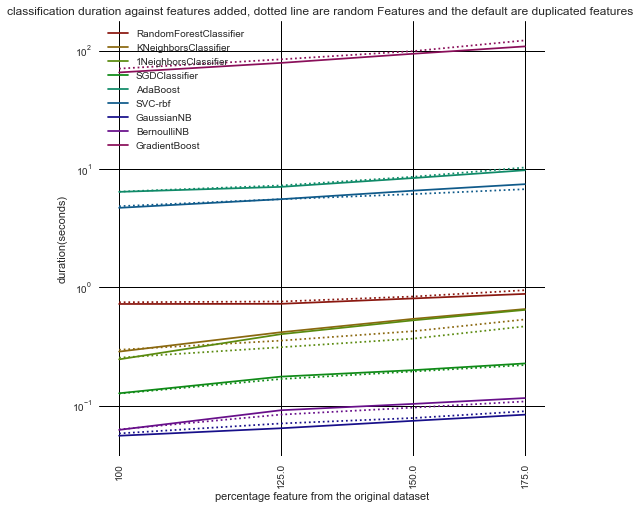

In [83]:
from LocalDatasets import DoneFeatureMan,read_durationMax

func = 'cvScoreFeatures5Duration'
func2 = 'cvScoreFeatures4Duration'
clfName = clfNames[0]
amountList = [0.25,0.5,0.75]
funcMan = DoneFeatureMan(func,clfName,amountList)
func2Man = DoneFeatureMan(func2,clfName,amountList)
intersect = []
for did in funcMan:
    if did in func2Man:
        intersect.append(did)
didList = intersect

funcDur = []
func2Dur = []
dur1 = []
dur2 = []
dur3 = []
typ = 0
for i,x in enumerate(clfNames):
    dur1.append([]) 
    dur2.append([])
    dur3.append([])
    funcDur.append([])
    func2Dur.append([])
    for j,x in enumerate(amountList):
        funcDur[i].append([])
        func2Dur[i].append([])
        dur1[i].append(0) 
        dur2[i].append(0)
        dur3[i].append(0)
    dur2[i].append(0)
    dur3[i].append(0)
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            if not checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func2,clfName,amount,did)
            funcDur[cs][i].append(read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
            func2Dur[cs][i].append(read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
            dur1[cs][i] = dur1[cs][i] + funcDur[cs][i][0][typ]/len(didList)
            dur1[cs][i] = dur1[cs][i] + funcDur[cs][i][0][typ+1]/len(didList)
            
            dur2[cs][i+1] = dur2[cs][i+1] + funcDur[cs][i][0][typ+2]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + funcDur[cs][i][0][typ+3]/len(didList)
            
            dur2[cs][0] = dur2[cs][0] + funcDur[cs][i][0][typ]/(len(didList)*len(amountList))
            dur2[cs][0] = dur2[cs][0] + funcDur[cs][i][0][typ+1]/(len(didList)*len(amountList))
            
            dur3[cs][i+1] = dur3[cs][i+1] + func2Dur[cs][i][0][typ+2]/len(didList)
            dur3[cs][i+1] = dur3[cs][i+1] + func2Dur[cs][i][0][typ+3]/len(didList)
            
            dur3[cs][0] = dur3[cs][0] + func2Dur[cs][i][0][typ]/(len(didList)*len(amountList))
            dur3[cs][0] = dur3[cs][0] + func2Dur[cs][i][0][typ+1]/(len(didList)*len(amountList))




for i,x in enumerate(amountList):
    amountList[i] = (x+1)*100
amountList2 = copy(amountList)
amountList.insert(0,100)
x_axis = amountList
cl = sns.hls_palette(len(dur2), l=.3, s=.8)
fig, ax = plt.subplots()
for i in range(0,len(dur2)):
#     _= ax.scatter(x_axis,dur1[i], label = clfNames[i],color = cl[i] )
    _= ax.plot(x_axis,dur2[i], color = cl[i],label = clfNames[i] )
    _= ax.plot(x_axis,dur3[i], color = cl[i],ls = ':' )

_=plt.title('classification duration against features added, dotted line are random Features and the default are duplicated features ')


fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log", nonposy='clip')
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.ylabel('duration(seconds)')
_=plt.xlabel('percentage feature from the original dataset')
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
_=plt.legend()
_=plt.show()


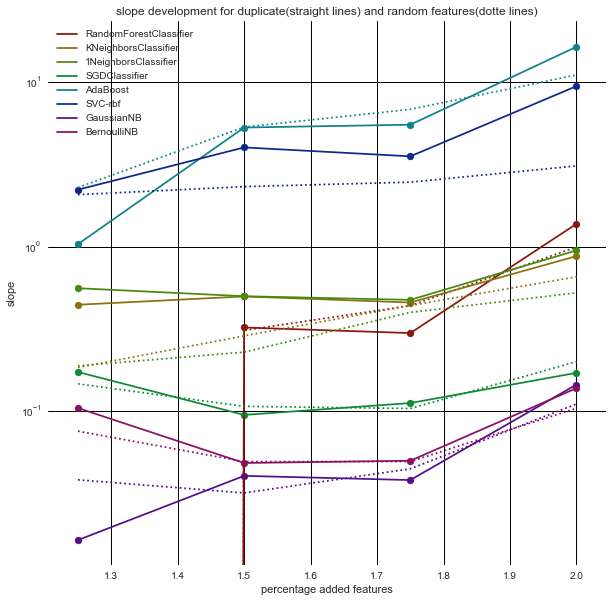

In [54]:
slopeDup = []
slopeRand = []
amountList2 = []
for i in amountList:
    amountList2.append(i/100)
for i,item in enumerate(dur2):
    slopeDup.append([])
    slopeRand.append([])
    for j,itemz in enumerate(item):
        if j == 0:
            count = 0
        else:
            slopeDup[i].append((dur2[i][j]-dur2[i][j-1])/(amountList2[j]-amountList2[j-1]))
            slopeRand[i].append((dur3[i][j]-dur3[i][j-1])/(amountList2[j]-amountList2[j-1]))

fig, ax = plt.subplots()
cl = sns.hls_palette(len(slopeDup), l=.3, s=.8)
for i,x in enumerate(slopeDup):
    ax.plot(amountList2[1:],slopeDup[i],label = clfNames[i],color= cl[i])
    ax.scatter(amountList2[1:],slopeDup[i],color= cl[i])
    ax.plot(amountList2[1:],slopeRand[i],ls = ':',color= cl[i])
plt.xlabel('percentage added features')
plt.ylabel('slope')
plt.title('slope development for duplicate(straight lines) and random features(dotte lines)')
fig.set_figheight(10)
fig.set_figwidth(10)
ax.set_yscale("log", nonposy='clip')
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
plt.legend()
plt.show()

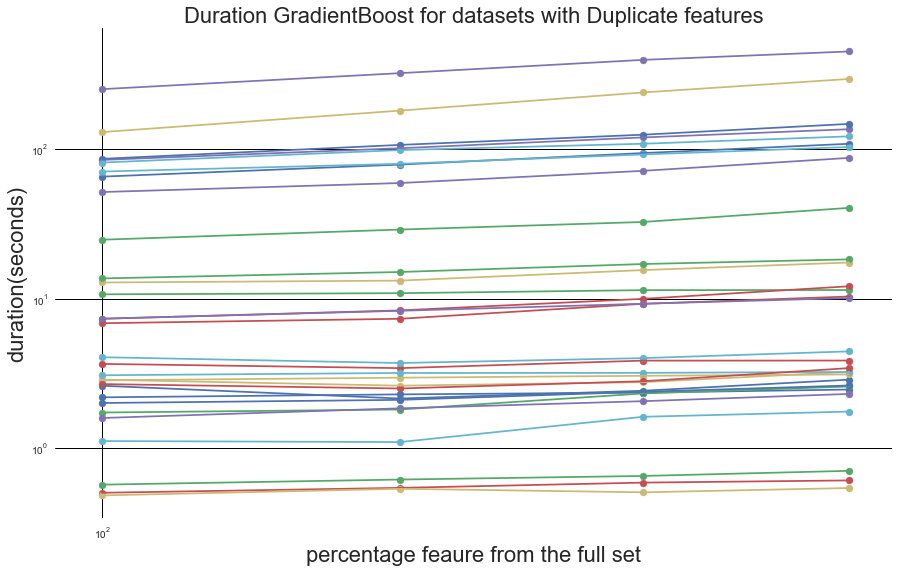

In [85]:
perDidRf = []
perDidDur = []
clf1 = 8
for i,item in enumerate(didList):
    perDidDur.append([])
    for amount in amountList:
        perDidDur[i].append(0)
for i,amount in enumerate(funcDur[clf1]):
    for j,did in enumerate(funcDur[clf1][i]):
        perDidDur[j][i+1] = perDidDur[j][i+1] + did[2]
        perDidDur[j][i+1] = perDidDur[j][i+1] + did[3]
        perDidDur[j][0] = perDidDur[j][0] + did[0]/(len(amountList)-1)
        perDidDur[j][0] = perDidDur[j][0] + did[1]/(len(amountList)-1)




fig, ax = plt.subplots()
_=plt.title('Duration ' + clfNames[clf1] + ' for datasets with Duplicate features',fontdict = {'fontsize': 22} )
     
for i,did in enumerate(didList):
    _=ax.plot(amountList, perDidDur[i])
    _=ax.scatter(amountList, perDidDur[i])
_=plt.ylabel('duration(seconds)',fontdict = {'fontsize': 22})
_=plt.xlabel('percentage feaure from the full set',fontdict = {'fontsize': 22})
fig.set_figheight(9)
fig.set_figwidth(15)
# _=plt.axhline(x = 20,linewidth=2, color = 'k')
# for i,amount in enumerate(amountList2):
#     _=plt.axvline(x=amount,color= 'black')
#     _=plt.axhline(y=mutualInf[i],color = 'black')
ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log", nonposy='clip')
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
_=ax.legend()
plt.show()

In [20]:
from LocalDatasets import DoneFeatureMan
func = 'cvScoreFeatures5Duration'
func2 = 'cvScoreFeatures4Duration'
clfName = clfNames[0]
amountList = [0.25,0.5,0.75,1.0]
funcMan = DoneFeatureMan(func,clfName,amountList)
func2Man = DoneFeatureMan(func2,clfName,amountList)
intersect = []
for did in funcMan:
    if did in func2Man:
        intersect.append(did)

In [76]:
func = 'cvScoreFeatures5Duration'
func2 = 'cvScoreFeatures4Duration'
clfName = clfNames[0]
amountList = [0.25,0.5,0.75,1.0]
funcMan = DoneFeatureMan(func,clfName,amountList)
func2Man = DoneFeatureMan(func2,clfName,amountList)
intersect = []
for did in funcMan:
    if did in func2Man:
        intersect.append(did)
didList = intersect

In [79]:
func = 'cvScoreFeatures4Duration'
amountList = [0.25,0.5,0.75,1.0]
from LocalDatasets import readDict,checkForExist
from completeRun import featureClf
NonCat = [1038,1043,1046,1049,1050,1063,1067,1068,1176,11,12,1459,1462,1464,1466,1467,1468,1475,1476,1478,1479,1485,1487]
second = [1489, 1491, 1492, 1493, 1494, 1497, 14, 1501, 1504, 1510, 1515, 1570, 16, 18, 22, 28, 300, 30, 32, 36, 375, 37, 39,40499,40509,40, 4134, 41, 44, 4538, 458, 53, 54]
for i in second:
    NonCat.append(i)
didList = NonCat
listTuples = []
for did in didList:
    for amount in amountList:
        if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
            listTuples.append((did,amount))

[(1038, 0.25),
 (1038, 0.5),
 (1038, 0.75),
 (1043, 0.25),
 (1043, 0.5),
 (1043, 0.75),
 (1046, 0.25),
 (1046, 0.5),
 (1046, 0.75),
 (1049, 0.25),
 (1049, 0.5),
 (1049, 0.75),
 (1050, 0.25),
 (1050, 0.5),
 (1050, 0.75),
 (1063, 0.25),
 (1063, 0.5),
 (1063, 0.75),
 (1068, 0.25),
 (1068, 0.5),
 (1068, 0.75),
 (1176, 0.25),
 (1176, 0.5),
 (1176, 0.75),
 (11, 0.25),
 (11, 0.5),
 (11, 0.75),
 (12, 0.25),
 (12, 0.5),
 (12, 0.75),
 (1459, 0.25),
 (1459, 0.5),
 (1459, 0.75),
 (1462, 0.25),
 (1462, 0.5),
 (1462, 0.75),
 (1464, 0.25),
 (1464, 0.5),
 (1464, 0.75),
 (1466, 0.25),
 (1466, 0.5),
 (1466, 0.75),
 (1467, 0.25),
 (1467, 0.5),
 (1467, 0.75),
 (1468, 0.25),
 (1468, 0.5),
 (1468, 0.75),
 (1475, 0.25),
 (1475, 0.5),
 (1475, 0.75),
 (1476, 0.25),
 (1476, 0.5),
 (1476, 0.75),
 (1478, 0.75)]

In [88]:
func = 'cvScoreFeatures5Duration'
func2 = 'cvScoreFeatures4Duration'
clfName = clfNames[0]
amountList = [0.25,0.5,0.75]
funcMan = DoneFeatureMan(func,clfName,amountList)
func2Man = DoneFeatureMan(func2,clfName,amountList)
intersect = []
for did in funcMan:
    if did in func2Man:
        intersect.append(did)
didList = intersect

In [92]:
for did in Cat:
    if did in intersect:
        print(did)

21
469


In [96]:
from LocalDatasets import doneFracs
func = 'scalability'
amountList = [0.0,0.1,0.4,0.5,0.6,0.7,0.8,0.9] 
amountListStr = []
for i in amountList:
    amountListStr.append(str(i))
doneFracs(func,clfName,amountListStr)
# funcMan = DoneFeatureMan(func,clfName,amountList)

[6,
 1036,
 12,
 1038,
 14,
 16,
 18,
 1043,
 20,
 21,
 1046,
 22,
 23,
 1049,
 1050,
 26,
 28,
 30,
 32,
 1570,
 36,
 4134,
 4135,
 1067,
 1068,
 44,
 46,
 40499,
 60,
 1120,
 151,
 1176,
 182,
 184,
 40645,
 40646,
 40647,
 40648,
 40649,
 40650,
 40651,
 40652,
 40653,
 40654,
 40655,
 40656,
 40664,
 40668,
 40670,
 40677,
 40678,
 40680,
 40687,
 40695,
 40696,
 40697,
 40702,
 40706,
 300,
 179000,
 312,
 375,
 1459,
 1461,
 1462,
 4534,
 953,
 1466,
 4538,
 1468,
 959,
 1475,
 1476,
 1478,
 1479,
 1485,
 1486,
 1487,
 1489,
 1491,
 1492,
 1493,
 1494,
 1497,
 1501,
 991,
 1504,
 1505,
 1022]

In [ ]:
list_of_files = []
for (dirpath, dirnames, filenames) in os.walk('C:\\Users\\S127788\\Documents\\GitHub\\assignment2\did'):
    for filename in filenames:
        if filename.endswith('cat.csv'): 
            list_of_files.append(int(filename[:-7]))
listExtra = []
for did in list_of_files:
    'FeatureManipulation'
    
        

In [98]:
func = 'FeatureManipulation'
amountList = [0.1,0.5,0.9]
funcMan = DoneFeatureMan(func,clfName,amountList)

In [99]:
countNC = 0
countC = 0
for did in funcMan:
    if did in NonCat:
        countNC = countNC + 1
    if did in Cat:
        countC = countC + 1

In [103]:
ku = 0
for did in NonCat:
    if readDict(did)['NumberOfFeatures'] > 10:
        ku = ku + 1
print(ku)

45


In [108]:
newCat = []
for did in list_of_files:
    if readDict(did)['NumberOfFeatures'] == readDict(did)['NumberOfSymbolicFeatures'] and readDict(did)['NumberOfInstances'] > 100 and readDict(did)['NumberOfInstances'] < 100000:
        if readDict(did)['NumberOfFeatures'] > 10:
            newCat.append(did)

In [107]:
list_of_files = []
for (dirpath, dirnames, filenames) in os.walk('C:\\Users\\S127788\\Documents\\GitHub\\assignment2\did'):
    for filename in filenames:
        if filename.endswith('cat.csv'): 
            list_of_files.append(int(filename[:-7]))

In [109]:
newCat

[1022,
 164,
 20,
 336,
 40591,
 40645,
 40646,
 40647,
 40648,
 40649,
 40650,
 40651,
 40652,
 40653,
 40654,
 40655,
 40656,
 40664,
 40668,
 40670,
 40677,
 40680,
 40686,
 40687,
 40695,
 40696,
 40697,
 40702,
 40706,
 4534,
 46,
 826,
 953,
 956]